<font size=+2 color="Black"><center><b>Effectiveness of Telehealth in Saudi Arabia During COVID-19 Pandemic</b></center></font>


# **About this notebook**



![](https://media1.tenor.com/images/ed7cffc243c6a6ffe63058e79d1ea0ac/tenor.gif?itemid=16735375)


In this notebook we discuss the current status of the use of remote health services applications    during the emerging Corona pandemic in Saudi Arabia , in addition to the effectiveness of these applications in supporting public health measures, and to know the opinions of users of applications such as the Tawakkalna application.


# Let's get started...
![](https://miro.medium.com/proxy/1*_JW1JaMpK_fVGld8pd1_JQ.gif)



# Loading libraries

In [1]:
#Loading libraries

import numpy as np
import pandas as pd
import seaborn as sns
import re
from collections import defaultdict,Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import textstat
from textblob import TextBlob 
from tqdm import tqdm
from statistics import *
from bidi.algorithm import get_display
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
#you have to download this packeg if you want arabic text 
import arabic_reshaper

# for scientific computing and technical computing
from scipy import linalg
from scipy.stats import norm
from scipy import stats

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
#from keras.initializers import Constant
#from keras.optimizers import Adam
#from tqdm import tqdm

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords

#from nltk.tokenize.moses import MosesDetokenizer

###### Farasa is an Arabic NLP toolkit serving the following tasks:
1.	Segmentation.
2.	Stemming.
3.	Named Entity Recognition (NER).
4.	Part Of Speech tagging (POS tagging).
5.	Diacritization.


In [2]:
from farasa.pos import FarasaPOSTagger 
from farasa.ner import FarasaNamedEntityRecognizer 
from farasa.diacratizer import FarasaDiacritizer 
from farasa.segmenter import FarasaSegmenter 
from farasa.stemmer import FarasaStemmer

In [3]:
# Sklearn
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
plt.style.use('seaborn')
from PIL import Image

In [4]:
# gensim
import gensim
from gensim import corpora, models, similarities, matutils
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Read Data

In [5]:
df=pd.read_excel("data_covid2.xlsx")

df.head()

ÿ∑ÿßÿ®ÿπ ÿ≤ŸÖŸÜŸä       ÿßŸÑÿπŸÖÿ± ÿßŸÑÿ≠ÿßŸÑÿ© ÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ© ÿßŸÑÿ¨ŸÜÿ≥ ÿßŸÑŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿ™ÿπŸÑŸäŸÖŸä ŸáŸÑ ÿ≥ŸÖÿπÿ™ ŸÖŸÜ ŸÇÿ®ŸÑ ÿπŸÜ ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ÿπÿØÿü ŸáŸÑ ÿßÿ≥ÿ™ÿÆÿØŸÖÿ™ ÿ£Ÿä ÿÆÿØŸÖÿßÿ™ ŸÑŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ÿπÿØ ŸÖŸÜ ŸÇÿ®ŸÑÿü ŸÑŸÇÿØ ÿßÿ≥ÿ™ÿÆÿØŸÖÿ™ ÿßŸÑÿÆÿØŸÖÿßÿ™ ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ŸèÿπÿØ ŸÅŸÇÿ∑ ÿ£ÿ´ŸÜÿßÿ° ÿ¨ÿßÿ¶ÿ≠ÿ© ŸÉŸàÿ±ŸàŸÜÿß ŸÑŸÇÿØ ÿßÿ≥ÿ™ÿÆÿØŸÖÿ™ ÿßŸÑÿÆÿØŸÖÿßÿ™ ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ŸèÿπÿØ ŸÇÿ®ŸÑ ÿ∏ŸáŸàÿ± ŸÅŸäÿ±Ÿàÿ≥ ŸÉŸàÿ±ŸàŸÜÿß ŸÖÿπÿ±ŸÅÿ™Ÿä ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿ£ÿ¨Ÿáÿ≤ÿ© ÿßŸÑÿ•ŸÑŸÉÿ™ÿ±ŸàŸÜŸäÿ© ÿ¨ŸäÿØÿ©: ÿ£Ÿä ŸÖŸÜ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿßŸÑÿ™ÿßŸÑŸäÿ© ŸÇŸÖÿ™ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖŸáÿü(ÿ≠ÿØÿØ ŸÉŸÑ ŸÖÿß ŸäŸÜÿ∑ÿ®ŸÇ):                                    ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ ŸÖÿßŸáŸä ÿ∑ÿ±ŸäŸÇŸá ÿßŸÑÿ™ŸàÿßÿµŸÑ ÿßŸÑÿ™Ÿä ÿßÿ≥ÿ™ÿÆÿØŸÖÿ™Ÿáÿß ŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßŸÑÿ±ÿπÿßŸäÿ© ÿπÿ®ÿ± ÿßŸÑÿÆÿØŸÖÿßÿ™ ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ŸèÿπÿØ (ÿ≠ÿØÿØ ŸÉŸÑ ŸÖÿß ŸäŸÜÿ∑ÿ®ŸÇ): ŸÉŸÖ ÿπÿØÿØ ÿßŸÑÿ≤Ÿäÿßÿ±ÿßÿ™ ÿßŸÑÿ™Ÿä ÿ≠ÿµŸÑÿ™ ÿπŸÑŸäŸáÿß ŸÖŸÜ ŸÇÿ®ŸÑ ŸÑŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ÿπÿØÿü ŸÉŸÖ ŸÖŸÜ ÿßŸÑŸàŸÇÿ™ ÿßÿ≥ÿ™ÿ∫ÿ±ŸÇ ŸÑŸÇÿßÿ°ŸÉ ŸÖÿπ ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ÿπÿØ (ÿ®ŸÖÿß ŸÅŸä ÿ∞ŸÑŸÉ ŸàŸÇÿ™ ÿßŸÑÿ•ÿπÿØÿßÿØ ŸàÿßŸÑÿßŸÜÿ™ÿ∏ÿßÿ±)ÿü  [ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ÿπÿØ ŸÅÿπÿßŸÑÿ© ŸÅŸä ÿ™ŸàÿµŸäŸÑ ÿ£ÿ≥ÿ¶ŸÑÿ™Ÿä ŸàŸÖÿÆÿßŸàŸÅŸä]  [ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ®ÿ≥Ÿäÿ∑ Ÿàÿ≥ŸáŸÑ ÿßŸÑŸÅŸáŸÖ]  [Ÿáÿ∞ÿß ÿßŸÑŸÜÿ∏ÿßŸÖ ŸÇÿßÿØÿ± ÿπŸÑŸâ ŸÅÿπŸÑ ŸÉŸÑ ŸÖÿß ÿ£ÿ±ŸäÿØŸá ÿ£ŸÜ ŸäŸÉŸàŸÜ ŸÇÿßÿØÿ±Ÿãÿß ÿπŸÑŸâ ÿßŸÑŸÇŸäÿßŸÖ ÿ®Ÿá.]  [ÿ™ÿπŸÖŸÑ ÿßŸÑÿÆÿØŸÖÿßÿ™ ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ŸèÿπÿØ ÿπŸÑŸâ ÿ™ÿ≠ÿ≥ŸäŸÜ ŸàÿµŸàŸÑŸä ÿ•ŸÑŸâ ÿÆÿØŸÖÿßÿ™ ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ©]  [ÿ™ŸàŸÅÿ± ŸÑŸä ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ŸèÿπÿØ ÿßŸÑŸàŸÇÿ™ ÿßŸÑÿ∞Ÿä ÿ£ŸÇÿ∂ŸäŸá ŸÅŸä ÿßŸÑÿ≥ŸÅÿ± ÿ•ŸÑŸâ ŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ÿ£Ÿà ÿπŸäÿßÿØÿ© ŸÖÿ™ÿÆÿµÿµÿ©.]  \
0 2021-10-06 20:47:11.224       Ÿ°Ÿ®-Ÿ¢Ÿ•        ÿ£ÿπÿ≤ÿ®\ÿπÿ≤ÿ®ÿßÿ°  ÿ£ŸÜÿ´Ÿâ            ÿ¨ÿßŸÖÿπŸä                                      ŸÜÿπŸÖ                                               ŸÜÿπŸÖ                                                 ŸÑÿß                                                       ŸÜÿπŸÖ                                             ŸÜÿπŸÖ                                 ŸÖŸàÿπÿØ, ÿµÿ≠ÿ™Ÿä, ÿ™ŸàŸÉŸÑŸÜÿß         ÿ™ŸàŸÉŸÑŸÜÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿπÿßŸÑŸÖ ÿ£ÿ´ÿ®ÿ™ ÿßŸÜŸá ÿß...                           ÿßŸÑÿØÿ±ÿØÿ¥ÿ© / ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ ÿßŸÑŸÜÿµŸäÿ©                                                                                              Ÿ°-Ÿ£                                                   Ÿ°Ÿ†-Ÿ¢Ÿ† ÿØŸÇŸäŸÇÿ©                                                                                 ŸÖŸàÿßŸÅŸÇ                          ŸÖŸàÿßŸÅŸÇ                                              ŸÖŸàÿßŸÅŸÇ                                                                ŸÖŸàÿßŸÅŸÇ                                                                   ŸÖŸàÿßŸÅŸÇ                                        
1 2021-10-07 04:14:31.799       Ÿ°Ÿ®-Ÿ¢Ÿ•        ÿ£ÿπÿ≤ÿ®\ÿπÿ≤ÿ®ÿßÿ°  ÿ£ŸÜÿ´Ÿâ            ÿ¨ÿßŸÖÿπŸä                                      ŸÜÿπŸÖ                                                ŸÑÿß                                                ŸÜÿπŸÖ                                                       ŸÜÿπŸÖ                                              ŸÑÿß                                 ŸÖŸàÿπÿØ, ÿµÿ≠ÿ™Ÿä, ÿ™ŸàŸÉŸÑŸÜÿß         ŸÖÿ™ŸàŸÇŸÅ ÿπŸÜÿØŸä ÿ®ÿπÿ∂ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑ ÿßŸÑÿ¨Ÿà...  ÿßŸÑŸÖŸÉÿßŸÑŸÖÿßÿ™ ÿßŸÑÿµŸàÿ™Ÿäÿ©/ÿßŸÑŸáÿßÿ™ŸÅŸäÿ©, ÿßŸÑÿØÿ±ÿØÿ¥ÿ©/ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ ÿßŸÑ...                                                                                                0                                                   Ÿ°Ÿ†-Ÿ¢Ÿ† ÿØŸÇŸäŸÇÿ©                                                                                 ŸÖŸàÿßŸÅŸÇ                          ŸÖŸàÿßŸÅŸÇ                                              ŸÖŸàÿßŸÅŸÇ                                                                ŸÖŸàÿßŸÅŸÇ                                                                   ŸÖŸàÿßŸÅŸÇ                         

# Data pre-processing

In [6]:
#df.astype(str) converts all column of df_Opinion DataFrame to string type.
df_Opinion=df[df.columns[11]].astype(str)

df_Opinion.head()

0     ÿ™ŸàŸÉŸÑŸÜÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿπÿßŸÑŸÖ ÿ£ÿ´ÿ®ÿ™ ÿßŸÜŸá ÿß...
1     ŸÖÿ™ŸàŸÇŸÅ ÿπŸÜÿØŸä ÿ®ÿπÿ∂ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑ ÿßŸÑÿ¨Ÿà...
2                                    ŸÖŸÜ ÿ£ŸÅÿ∂ŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™
3    .. ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿßÿÆŸäÿ± ..ŸÖÿπ ÿßŸÜŸä ÿπÿßŸÖŸÑ ÿ≥ŸÖÿßÿ≠ ŸÑŸÑŸÖŸàŸÇÿπ Ÿàÿ¥...
4    4 ŸÜÿ¨ŸàŸÖ ŸÇŸÑŸäŸÑÿ© ÿ®ÿ≠ŸÇŸá ŸÖÿ¥ŸÉŸÑÿ™Ÿá ÿ®ÿπÿ∂ ÿßŸÑÿ£ŸàŸÇÿßÿ™ ŸÖÿß Ÿäÿ¥ÿ™ÿ∫ŸÑ ...
Name: ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ, dtype: object

In [7]:
df_Opinion.tail()

1035        ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá
1036        ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá
1037        ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá
1038    ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá
1039    ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá
Name: ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ, dtype: object

In [8]:
df_Opinion.shape

(1040,)

In [9]:
print(type(df_Opinion))

<class 'pandas.core.series.Series'>


In [10]:
#Null values
df_Opinion.isnull().value_counts()

False    1040
Name: ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ, dtype: int64

In [11]:
# Drop duplicates
df_Opinion.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (1040, 28)


In [12]:
#Column name changeÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ
complaints_df=df[['ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ']].rename(columns={'ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ':'complaints'})

In [13]:
# To display full text
pd.set_option('display.max_colwidth',-1)#can see the whole data on one single row
complaints_df

complaints
0      ÿ™ŸàŸÉŸÑŸÜÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿπÿßŸÑŸÖ ÿ£ÿ´ÿ®ÿ™ ÿßŸÜŸá ÿßŸÑÿ£ŸÅÿ∂ŸÑ                                                                                                                        
1      ŸÖÿ™ŸàŸÇŸÅ ÿπŸÜÿØŸä ÿ®ÿπÿ∂ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑ ÿßŸÑÿ¨Ÿàÿßÿ≤ ÿßŸÑÿµÿ≠Ÿä ŸàÿπÿØÿ© ÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ŸàŸäÿπÿ∑ŸäŸÜŸä ŸÑŸÖŸÜ ÿßÿØÿÆŸÑ ÿπŸÑŸäŸáÿß ÿßŸÜ ÿ™ŸàŸÉŸÜÿß ŸÖŸàŸÇŸÅ                                                                   
2      ŸÖŸÜ ÿ£ŸÅÿ∂ŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™                                                                                                                                                         
3     .. ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿßÿÆŸäÿ± ..ŸÖÿπ ÿßŸÜŸä ÿπÿßŸÖŸÑ ÿ≥ŸÖÿßÿ≠ ŸÑŸÑŸÖŸàŸÇÿπ Ÿàÿ¥ÿ∫ÿßŸÑ ŸÖÿπ ŸÉŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™....ÿßŸÑÿß ÿßŸÜ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿß ŸäÿπŸÖŸÑ Ÿàÿ™ÿ∏Ÿáÿ± ÿ±ÿ≥ÿßŸÑŸá ÿßŸÑŸÖŸàŸÇÿπ ÿ±ÿ∫ŸÖ ÿ≠ÿ∞ŸÅŸä ŸÑŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÉÿ´ÿ±ŸÖŸÜ ŸÖÿ±Ÿá..ÿØÿπŸÖŸÉŸÖ ŸÑÿßÿµŸÑÿßÿ≠ Ÿáÿ∞Ÿá ÿßŸÑŸÖÿ¥ŸÉŸÑŸá\n
4     4 ŸÜÿ¨ŸàŸÖ ŸÇŸÑŸäŸÑÿ© ÿ®ÿ≠ŸÇŸá ŸÖÿ¥ŸÉŸÑÿ™Ÿá ÿ®ÿπÿ∂ ÿßŸÑÿ£ŸàŸÇÿßÿ™ ŸÖÿß Ÿäÿ¥ÿ™ÿ∫ŸÑ ÿ®ÿØŸàŸÜ ŸÜÿ™                                                                                                                      
...                                                     ...                                                                                                                      
1035  ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                                   
1036  ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                                   
1037  ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                                   
1038  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                               
1039  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                               

[1040 rows x 1 columns]

In [14]:
#load data into a DataFrame object:
dataframe=pd.DataFrame(df_Opinion)#delete
dataframe

ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ
0      ÿ™ŸàŸÉŸÑŸÜÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿπÿßŸÑŸÖ ÿ£ÿ´ÿ®ÿ™ ÿßŸÜŸá ÿßŸÑÿ£ŸÅÿ∂ŸÑ                                                                                                                        
1      ŸÖÿ™ŸàŸÇŸÅ ÿπŸÜÿØŸä ÿ®ÿπÿ∂ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑ ÿßŸÑÿ¨Ÿàÿßÿ≤ ÿßŸÑÿµÿ≠Ÿä ŸàÿπÿØÿ© ÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ŸàŸäÿπÿ∑ŸäŸÜŸä ŸÑŸÖŸÜ ÿßÿØÿÆŸÑ ÿπŸÑŸäŸáÿß ÿßŸÜ ÿ™ŸàŸÉŸÜÿß ŸÖŸàŸÇŸÅ                                                                   
2      ŸÖŸÜ ÿ£ŸÅÿ∂ŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™                                                                                                                                                         
3     .. ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿßÿÆŸäÿ± ..ŸÖÿπ ÿßŸÜŸä ÿπÿßŸÖŸÑ ÿ≥ŸÖÿßÿ≠ ŸÑŸÑŸÖŸàŸÇÿπ Ÿàÿ¥ÿ∫ÿßŸÑ ŸÖÿπ ŸÉŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™....ÿßŸÑÿß ÿßŸÜ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿß ŸäÿπŸÖŸÑ Ÿàÿ™ÿ∏Ÿáÿ± ÿ±ÿ≥ÿßŸÑŸá ÿßŸÑŸÖŸàŸÇÿπ ÿ±ÿ∫ŸÖ ÿ≠ÿ∞ŸÅŸä ŸÑŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÉÿ´ÿ±ŸÖŸÜ ŸÖÿ±Ÿá..ÿØÿπŸÖŸÉŸÖ ŸÑÿßÿµŸÑÿßÿ≠ Ÿáÿ∞Ÿá ÿßŸÑŸÖÿ¥ŸÉŸÑŸá\n
4     4 ŸÜÿ¨ŸàŸÖ ŸÇŸÑŸäŸÑÿ© ÿ®ÿ≠ŸÇŸá ŸÖÿ¥ŸÉŸÑÿ™Ÿá ÿ®ÿπÿ∂ ÿßŸÑÿ£ŸàŸÇÿßÿ™ ŸÖÿß Ÿäÿ¥ÿ™ÿ∫ŸÑ ÿ®ÿØŸàŸÜ ŸÜÿ™                                                                                                                      
...                                                     ...                                                                                                                      
1035  ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                                   
1036  ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                                   
1037  ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                                   
1038  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                               
1039  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                               

[1040 rows x 1 columns]

In [15]:
# data splitting
X_train, X_test = train_test_split(complaints_df, test_size=0.3, random_state=111)

In [16]:
X_train['complaints'].value_counts()

ÿ®ÿ∑Ÿäÿ¶ ŸÅŸä ÿßŸÑÿßŸàŸÇÿßÿ™ ÿßŸÑŸÖŸáŸÖÿ©                                                     7
ŸÜŸÇŸÑŸá ŸÜŸàÿπŸäÿ© Ÿáÿ∞ÿß ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÅŸä ÿ¨ÿπŸÑ ŸÉŸÑ ŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨ ŸÖŸÜ ÿßÿ´ÿ®ÿßÿ™ÿßÿ™ ŸÅŸä ÿ¨Ÿáÿßÿ≤ŸÉ              3
ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß                                                                  3
ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÖÿ™ÿπŸàÿ® ÿπŸÑŸäŸá ÿßÿ¥ŸÉÿ± ŸÉŸÑ ÿßŸÑŸÇÿßÿ¶ŸÖŸäŸÜ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸàÿßŸÑŸä ŸÖÿ≤ŸäÿØ ŸÖŸÜ ÿßŸÑÿ™ŸÇÿØŸÖ    3
ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÅŸÇ ÿßŸÑŸÑŸá ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ ÿπŸÑŸäŸá                                               3
                                                                          ..
ŸÖŸÜ ÿ£ŸÅÿ∂ŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™                                                          1
ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ                                                  1
ŸÖŸÖÿ™ÿßÿ≤ Ÿàÿ•ŸÑŸâ ÿßŸÑÿ£ŸÖÿßŸÖ                                                          1
ÿ£ÿ™ŸÖŸÜŸâ ÿ≠ŸÑ ŸÖÿ¥ŸÉŸÑÿ© ÿπÿØŸÖ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´                                                

In [17]:
X_train['complaints']

654    ÿ¥ŸÉÿ±ÿß ÿ™ŸàŸÉŸÑŸÜÿß ÿ¥ŸÉÿ±ÿß ÿ≠ŸÉŸàŸÖÿ™ŸÜÿß ÿßŸÑÿ±ÿ¥ŸäÿØÿ©\n                                                                                                                                          
371    ÿ™ÿ∑ÿ®ŸäŸÇ ÿµÿ≠ÿ™Ÿä ÿ™ÿ¨ÿ±ÿ®ÿ© ÿ≥Ÿäÿ¶Ÿá ÿ¨ÿØÿß                                                                                                                                                   
147    ÿßŸàÿ¨Ÿá ŸÖÿ¥ŸÉŸÑŸá ÿπÿØŸÖ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸà ÿßŸÑÿ™ÿπŸÑŸäŸÇ ÿßÿ´ŸÜÿßÿ° ÿßŸÑÿ™ÿ≠ÿØŸäÿ´                                                                                                                             
27     ÿßÿµÿ®ÿ≠ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÉŸàÿ´ŸäŸÇÿ© ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ŸÉŸÑ ŸÖÿ≠ÿ™ŸàŸäÿßÿ™ ÿßÿ®ÿ¥ÿ± ÿßÿ±ÿ¨Ÿà ÿßŸÜ Ÿäÿ™ŸÖ ÿßŸÑÿßŸÉÿ™ŸÅÿßÿ° ÿ®Ÿá ÿπŸÜ ÿßŸÑÿßÿ´ÿ®ÿßÿ™ÿßÿ™ ÿßŸÑÿÆÿ±Ÿâ ŸÖÿ´ŸÑ ÿßŸÑÿ±ÿÆÿµÿ© ŸàÿßŸÑÿßÿ≥ÿ™ŸÖÿßÿ±ÿ© ŸàÿßŸÑÿ™ÿ£ŸÖŸäŸÜ Ÿàÿ¨Ÿàÿßÿ≤ ÿßŸÑÿ≥ŸÅÿ± ŸàÿßŸÑÿ≠ÿßŸÑÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ŸàÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ© ŸÑŸÉŸÑ ÿ¥ÿÆÿµ.
72     ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿ®ŸÖÿß ÿ™ÿπŸÜŸäŸ

In [18]:
dataframe[dataframe.columns[0]]

0        ÿ™ŸàŸÉŸÑŸÜÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿπÿßŸÑŸÖ ÿ£ÿ´ÿ®ÿ™ ÿßŸÜŸá ÿßŸÑÿ£ŸÅÿ∂ŸÑ                                                                                                                        
1        ŸÖÿ™ŸàŸÇŸÅ ÿπŸÜÿØŸä ÿ®ÿπÿ∂ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑ ÿßŸÑÿ¨Ÿàÿßÿ≤ ÿßŸÑÿµÿ≠Ÿä ŸàÿπÿØÿ© ÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ŸàŸäÿπÿ∑ŸäŸÜŸä ŸÑŸÖŸÜ ÿßÿØÿÆŸÑ ÿπŸÑŸäŸáÿß ÿßŸÜ ÿ™ŸàŸÉŸÜÿß ŸÖŸàŸÇŸÅ                                                                   
2        ŸÖŸÜ ÿ£ŸÅÿ∂ŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™                                                                                                                                                         
3       .. ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿßÿÆŸäÿ± ..ŸÖÿπ ÿßŸÜŸä ÿπÿßŸÖŸÑ ÿ≥ŸÖÿßÿ≠ ŸÑŸÑŸÖŸàŸÇÿπ Ÿàÿ¥ÿ∫ÿßŸÑ ŸÖÿπ ŸÉŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™....ÿßŸÑÿß ÿßŸÜ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿß ŸäÿπŸÖŸÑ Ÿàÿ™ÿ∏Ÿáÿ± ÿ±ÿ≥ÿßŸÑŸá ÿßŸÑŸÖŸàŸÇÿπ ÿ±ÿ∫ŸÖ ÿ≠ÿ∞ŸÅŸä ŸÑŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÉÿ´ÿ±ŸÖŸÜ ŸÖÿ±Ÿá..ÿØÿπŸÖŸÉŸÖ ŸÑÿßÿµŸÑÿßÿ≠ Ÿáÿ∞Ÿá ÿßŸÑŸÖÿ¥ŸÉŸÑŸá\n
4    

In [19]:
dataframe

ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ
0      ÿ™ŸàŸÉŸÑŸÜÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿπÿßŸÑŸÖ ÿ£ÿ´ÿ®ÿ™ ÿßŸÜŸá ÿßŸÑÿ£ŸÅÿ∂ŸÑ                                                                                                                        
1      ŸÖÿ™ŸàŸÇŸÅ ÿπŸÜÿØŸä ÿ®ÿπÿ∂ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑ ÿßŸÑÿ¨Ÿàÿßÿ≤ ÿßŸÑÿµÿ≠Ÿä ŸàÿπÿØÿ© ÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ŸàŸäÿπÿ∑ŸäŸÜŸä ŸÑŸÖŸÜ ÿßÿØÿÆŸÑ ÿπŸÑŸäŸáÿß ÿßŸÜ ÿ™ŸàŸÉŸÜÿß ŸÖŸàŸÇŸÅ                                                                   
2      ŸÖŸÜ ÿ£ŸÅÿ∂ŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™                                                                                                                                                         
3     .. ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿßÿÆŸäÿ± ..ŸÖÿπ ÿßŸÜŸä ÿπÿßŸÖŸÑ ÿ≥ŸÖÿßÿ≠ ŸÑŸÑŸÖŸàŸÇÿπ Ÿàÿ¥ÿ∫ÿßŸÑ ŸÖÿπ ŸÉŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™....ÿßŸÑÿß ÿßŸÜ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿß ŸäÿπŸÖŸÑ Ÿàÿ™ÿ∏Ÿáÿ± ÿ±ÿ≥ÿßŸÑŸá ÿßŸÑŸÖŸàŸÇÿπ ÿ±ÿ∫ŸÖ ÿ≠ÿ∞ŸÅŸä ŸÑŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÉÿ´ÿ±ŸÖŸÜ ŸÖÿ±Ÿá..ÿØÿπŸÖŸÉŸÖ ŸÑÿßÿµŸÑÿßÿ≠ Ÿáÿ∞Ÿá ÿßŸÑŸÖÿ¥ŸÉŸÑŸá\n
4     4 ŸÜÿ¨ŸàŸÖ ŸÇŸÑŸäŸÑÿ© ÿ®ÿ≠ŸÇŸá ŸÖÿ¥ŸÉŸÑÿ™Ÿá ÿ®ÿπÿ∂ ÿßŸÑÿ£ŸàŸÇÿßÿ™ ŸÖÿß Ÿäÿ¥ÿ™ÿ∫ŸÑ ÿ®ÿØŸàŸÜ ŸÜÿ™                                                                                                                      
...                                                     ...                                                                                                                      
1035  ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                                   
1036  ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                                   
1037  ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                                   
1038  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                               
1039  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ ÿπŸÑŸâ ÿßŸÑÿÆÿØŸÖŸá ÿßŸÑŸÖŸÇÿØŸÖŸá                                                                                                                                               

[1040 rows x 1 columns]

In [20]:
#Column name changeÿ£ŸÜÿß ÿ±ÿßÿ∂Ÿç ÿπŸÜ ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿ™Ÿä ÿ™ŸÑŸÇŸäÿ™Ÿáÿß ŸÖŸÜ ÿÆŸÑÿßŸÑ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ™ŸÉŸÜŸàŸÑŸàÿ¨Ÿäÿß ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ŸèÿπÿØ

df_like=df[df.columns[25]].rename('like')

In [21]:
df_like=pd.DataFrame(df_like)
df_like

like
0     ŸÖŸàÿßŸÅŸÇ    
1     ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ
2     ŸÑÿß ÿ£ÿπÿ±ŸÅ  
3     ŸÑÿß ÿ£ÿπÿ±ŸÅ  
4     ŸÑÿß ÿ£ÿπÿ±ŸÅ  
...       ...  
1035  ŸÑÿß ÿ£ÿπÿ±ŸÅ  
1036  ŸÑÿß ÿ£ÿπÿ±ŸÅ  
1037  ŸÑÿß ÿ£ÿπÿ±ŸÅ  
1038  ŸÑÿß ÿ£ÿπÿ±ŸÅ  
1039  ŸÑÿß ÿ£ÿπÿ±ŸÅ  

[1040 rows x 1 columns]

In [22]:
df_like.count()

like    1040
dtype: int64

In [23]:
print('Total Reviews in this data: {}'.format(df_like.shape[0]))
print('Total Unique Users in this data: {}'.format(df_like['like'].nunique()))

Total Reviews in this data: 1040
Total Unique Users in this data: 3


In [24]:
percent_class=df_like.like.unique()
print(percent_class)

['ŸÖŸàÿßŸÅŸÇ' 'ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ' 'ŸÑÿß ÿ£ÿπÿ±ŸÅ']


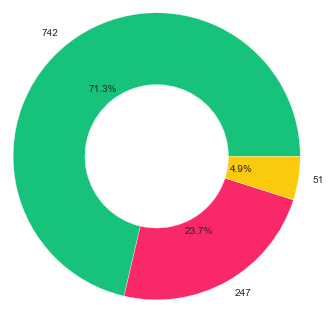

In [25]:
percent_class=df_like.value_counts()
colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_= plt.pie(percent_class,radius = 1.2,labels=percent_class,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

# Regular Expressions

we use Regular Expression by  string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

In [26]:
# Convert to list
data = dataframe[dataframe.columns[0]].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove Numbers
data = [re.sub("\d", "", sent) for sent in data]

data = [re.sub("pdf", "", sent) for sent in data]
data = [re.sub("!", "", sent) for sent in data]
data = [re.sub("ÿüÿü", "", sent) for sent in data]
data = [re.sub("üëéüëé", "", sent) for sent in data]
data = [re.sub("ŸÖŸÜ", "ÿßŸÜ", sent) for sent in data]
data = [re.sub("ÿπŸÜ", "ÿπŸÑŸâ", sent) for sent in data]
data = [re.sub("ÿßÿ∞ÿß", "ŸÑŸÖÿßÿ∞ÿß", sent) for sent in data]
print(data)

[' ÿ™ŸàŸÉŸÑŸÜÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿπÿßŸÑŸÖ ÿ£ÿ´ÿ®ÿ™ ÿßŸÜŸá ÿßŸÑÿ£ŸÅÿ∂ŸÑ', ' ŸÖÿ™ŸàŸÇŸÅ ÿπŸÑŸâÿØŸä ÿ®ÿπÿ∂ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑ ÿßŸÑÿ¨Ÿàÿßÿ≤ ÿßŸÑÿµÿ≠Ÿä ŸàÿπÿØÿ© ÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ŸàŸäÿπÿ∑ŸäŸÜŸä ŸÑÿßŸÜ ÿßÿØÿÆŸÑ ÿπŸÑŸäŸáÿß ÿßŸÜ ÿ™ŸàŸÉŸÜÿß ŸÖŸàŸÇŸÅ', ' ÿßŸÜ ÿ£ŸÅÿ∂ŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™', '.. ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿßÿÆŸäÿ± ..ŸÖÿπ ÿßŸÜŸä ÿπÿßŸÖŸÑ ÿ≥ŸÖÿßÿ≠ ŸÑŸÑŸÖŸàŸÇÿπ Ÿàÿ¥ÿ∫ÿßŸÑ ŸÖÿπ ŸÉŸÑ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™....ÿßŸÑÿß ÿßŸÜ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿß ŸäÿπŸÖŸÑ Ÿàÿ™ÿ∏Ÿáÿ± ÿ±ÿ≥ÿßŸÑŸá ÿßŸÑŸÖŸàŸÇÿπ ÿ±ÿ∫ŸÖ ÿ≠ÿ∞ŸÅŸä ŸÑŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÉÿ´ÿ±ÿßŸÜ ŸÖÿ±Ÿá..ÿØÿπŸÖŸÉŸÖ ŸÑÿßÿµŸÑÿßÿ≠ Ÿáÿ∞Ÿá ÿßŸÑŸÖÿ¥ŸÉŸÑŸá ', ' ŸÜÿ¨ŸàŸÖ ŸÇŸÑŸäŸÑÿ© ÿ®ÿ≠ŸÇŸá ŸÖÿ¥ŸÉŸÑÿ™Ÿá ÿ®ÿπÿ∂ ÿßŸÑÿ£ŸàŸÇÿßÿ™ ŸÖÿß Ÿäÿ¥ÿ™ÿ∫ŸÑ ÿ®ÿØŸàŸÜ ŸÜÿ™', 'ÿßÿ®ÿØÿßÿπ ÿ™ŸÇŸÜŸä ÿ≥ÿπŸàÿØŸä', 'ÿßÿ™ÿßŸÜŸâ ÿßÿ∂ÿßŸÅŸá ÿßŸÑÿØŸÅÿπ ÿßŸÑÿ•ŸÑŸÉÿ™ÿ±ŸàŸÜŸä ŸÑŸÑŸàÿµŸàŸÑ ÿßŸÑŸâ ÿßŸÜÿµÿ© ŸÖÿ™ŸÉÿßŸÖŸÑÿ©', 'ÿßÿ™ÿßŸÜŸâ ÿ™ÿ∑ŸàŸäÿ±Ÿá ŸÑÿ¨ÿπŸÑŸá ÿ£ÿ≥ŸáŸÑ ÿπÿßŸÖÿ© ÿßŸÑŸÖŸàÿßÿ∑ŸÜŸäŸÜ ŸàÿßÿÆÿ™Ÿäÿßÿ± ŸÖÿµÿ∑ŸÑÿ≠ÿßÿ™ ŸàŸÖÿ≥ŸÖŸäÿßÿ™ ÿ≥ŸáŸÑÿ© ÿßŸ

In [27]:
stopwords_list = stopwords.words('arabic')
stopwords_list

['ÿ•ÿ∞',
 'ÿ•ÿ∞ÿß',
 'ÿ•ÿ∞ŸÖÿß',
 'ÿ•ÿ∞ŸÜ',
 'ÿ£ŸÅ',
 'ÿ£ŸÇŸÑ',
 'ÿ£ŸÉÿ´ÿ±',
 'ÿ£ŸÑÿß',
 'ÿ•ŸÑÿß',
 'ÿßŸÑÿ™Ÿä',
 'ÿßŸÑÿ∞Ÿä',
 'ÿßŸÑÿ∞ŸäŸÜ',
 'ÿßŸÑŸÑÿßÿ™Ÿä',
 'ÿßŸÑŸÑÿßÿ¶Ÿä',
 'ÿßŸÑŸÑÿ™ÿßŸÜ',
 'ÿßŸÑŸÑÿ™Ÿäÿß',
 'ÿßŸÑŸÑÿ™ŸäŸÜ',
 'ÿßŸÑŸÑÿ∞ÿßŸÜ',
 'ÿßŸÑŸÑÿ∞ŸäŸÜ',
 'ÿßŸÑŸÑŸàÿßÿ™Ÿä',
 'ÿ•ŸÑŸâ',
 'ÿ•ŸÑŸäŸÉ',
 'ÿ•ŸÑŸäŸÉŸÖ',
 'ÿ•ŸÑŸäŸÉŸÖÿß',
 'ÿ•ŸÑŸäŸÉŸÜ',
 'ÿ£ŸÖ',
 'ÿ£ŸÖÿß',
 'ÿ£ŸÖÿß',
 'ÿ•ŸÖÿß',
 'ÿ£ŸÜ',
 'ÿ•ŸÜ',
 'ÿ•ŸÜÿß',
 'ÿ£ŸÜÿß',
 'ÿ£ŸÜÿ™',
 'ÿ£ŸÜÿ™ŸÖ',
 'ÿ£ŸÜÿ™ŸÖÿß',
 'ÿ£ŸÜÿ™ŸÜ',
 'ÿ•ŸÜŸÖÿß',
 'ÿ•ŸÜŸá',
 'ÿ£ŸÜŸâ',
 'ÿ£ŸÜŸâ',
 'ÿ¢Ÿá',
 'ÿ¢Ÿáÿß',
 'ÿ£Ÿà',
 'ÿ£ŸàŸÑÿßÿ°',
 'ÿ£ŸàŸÑÿ¶ŸÉ',
 'ÿ£ŸàŸá',
 'ÿ¢Ÿä',
 'ÿ£Ÿä',
 'ÿ£ŸäŸáÿß',
 'ÿ•Ÿä',
 'ÿ£ŸäŸÜ',
 'ÿ£ŸäŸÜ',
 'ÿ£ŸäŸÜŸÖÿß',
 'ÿ•ŸäŸá',
 'ÿ®ÿÆ',
 'ÿ®ÿ≥',
 'ÿ®ÿπÿØ',
 'ÿ®ÿπÿ∂',
 'ÿ®ŸÉ',
 'ÿ®ŸÉŸÖ',
 'ÿ®ŸÉŸÖ',
 'ÿ®ŸÉŸÖÿß',
 'ÿ®ŸÉŸÜ',
 'ÿ®ŸÑ',
 'ÿ®ŸÑŸâ',
 'ÿ®ŸÖÿß',
 'ÿ®ŸÖÿßÿ∞ÿß',
 'ÿ®ŸÖŸÜ',
 'ÿ®ŸÜÿß',
 'ÿ®Ÿá',
 'ÿ®Ÿáÿß',
 'ÿ®ŸáŸÖ',
 'ÿ®ŸáŸÖÿß',
 'ÿ®ŸáŸÜ',
 'ÿ®Ÿä',
 'ÿ®ŸäŸÜ',
 'ÿ®ŸäÿØ',
 'ÿ™ŸÑŸÉ',
 'ÿ™ŸÑŸÉŸÖ',
 'ÿ™ŸÑŸÉŸÖÿß',
 'ÿ™Ÿá',
 'ÿ™Ÿä',
 'ÿ™ŸäŸ

In [28]:
# return an array
stemmer = FarasaStemmer()

def stemm(tweetstr):
    stemstr = []
    for s in tweetstr:
        st = stemmer.stem(s)
        stemstr.append(st)
    return stemstr

In [29]:
data = stemm(data)

In [30]:
data

['ÿ™ŸàŸÉŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿπÿßŸÑŸÖ ÿ£ÿ´ÿ®ÿ™ ÿßŸÜ ÿ£ŸÅÿ∂ŸÑ',
 'ŸÖÿ™ŸàŸÇŸÅ ÿπŸÑŸâÿØŸä ÿ®ÿπÿ∂ ÿ™ÿ∑ÿ®ŸäŸÇ ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ŸÖÿ´ÿßŸÑ ÿ¨Ÿàÿßÿ≤ ÿµÿ≠Ÿä ÿπÿØÿ© ÿ™ÿ∑ÿ®ŸäŸÇ ÿ£ÿπÿ∑Ÿâ ŸÑÿßŸÜ ÿ£ÿØÿÆŸÑ ÿπŸÑŸâ ÿßŸÜ ÿ™ŸàŸÉ ŸÖŸàŸÇŸÅ',
 'ÿßŸÜ ÿ£ŸÅÿ∂ŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ',
 '. . ÿ™ÿ≠ÿØŸäÿ´ ÿ£ÿÆŸäÿ± . .ŸÖÿπ ÿßŸÜ ÿπÿßŸÖŸÑ ÿ≥ŸÖÿßÿ≠ ŸÖŸàŸÇÿπ ÿ¥ÿ∫ÿßŸÑ ŸÖÿπ ŸÉŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ . ...ÿßŸÑÿß ÿßŸÜ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑ ŸÑÿß ÿπŸÖŸÑ ÿ∏Ÿáÿ± ÿ±ÿ≥ÿßŸÑ ŸÖŸàŸÇÿπ ÿ±ÿ∫ŸÖ ÿ≠ÿ∞ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÉÿ´ÿ± ŸÖÿ± . .ÿØÿπŸÖŸÉŸÖ ÿ•ÿµŸÑÿßÿ≠ Ÿáÿ∞ÿß ŸÖÿ¥ŸÉŸÑŸá',
 'ŸÜÿ¨ŸÖ ŸÇŸÑŸäŸÑ ÿ≠ŸÇ ŸÖÿ¥ŸÉŸÑÿ© ÿ®ÿπÿ∂ ŸàŸÇÿ™ ŸÖÿß ÿßÿ¥ÿ™ÿ∫ŸÑ ÿØŸàŸÜ ŸÜÿ™',
 'ÿßÿ®ÿØÿßÿπ ÿ™ŸÇŸÜŸä ÿ≥ÿπŸàÿØŸä',
 'ÿßÿ™ÿßŸÜŸâ ÿßÿ∂ÿßŸÅ ÿØŸÅÿπ ÿ•ŸÑŸÉÿ™ÿ±ŸàŸÜŸä ŸàÿµŸàŸÑ ÿßŸÑŸâ ÿßŸÜÿµ ŸÖÿ™ŸÉÿßŸÖŸÑ',
 'ÿßÿ™ÿßŸÜŸâ ÿ™ÿ∑ŸàŸäÿ± ÿ¨ÿπŸÑ ÿ£ÿ≥ŸáŸÑ ÿπÿßŸÖ ŸÖŸàÿßÿ∑ŸÜ ÿßÿÆÿ™Ÿäÿßÿ± ŸÖÿµÿ∑ŸÑÿ≠ ŸÖÿ≥ŸÖŸâ ÿ≥ŸáŸÑ ŸÅŸáŸÖ ÿ¨ŸÖŸäÿπ',
 'ÿ£ÿ¨ŸÖŸÑ ÿ£ŸÅÿ∂ŸÑ ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÖÿ≠ÿßŸÅÿ∏ÿ© ÿπŸÑŸâ ÿµÿ≠ÿ© ÿ•ŸÜÿ≥ÿßŸÜ ÿ™ŸàŸÅŸäŸÇ ÿ•ŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá',
 'ÿ£ÿ≠ÿØ ÿßŸÜÿ¨ÿ≤ Ÿàÿ∑ŸÜŸäÿ© ÿßŸÑÿ∞Ÿä ŸÅÿÆÿ± ÿ®',
 'ÿßÿ≠ÿ≥ ÿ

# TF-IDF$CountVectorizer

In [31]:
#Instantiate
vectorizer=CountVectorizer()
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [32]:
countvec.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:

vectorizer.get_feature_names() # feature names are the terms /words

['ÿ¢ÿßŸÜ',
 'ÿ¢ÿßŸÜÿß',
 'ÿ¢ÿÆÿ±',
 'ÿ¢ŸÅÿ©',
 'ÿ¢ŸÖŸäŸÜ',
 'ÿ¢ŸÜ',
 'ÿ£ÿßŸÜ',
 'ÿ£ÿßŸÜŸäÿß',
 'ÿ£ÿ®ÿØ',
 'ÿ£ÿ®ÿ¥ÿ±',
 'ÿ£ÿ®ÿπÿØ',
 'ÿ£ÿ™ÿßŸÜ',
 'ÿ£ÿ™ÿßŸÜŸâ',
 'ÿ£ÿ™ŸÉÿßŸÑ',
 'ÿ£ÿ™ŸàŸÇÿπ',
 'ÿ£ÿ´ÿ®ÿ™',
 'ÿ£ÿ´ÿ±',
 'ÿ£ÿ´ŸÜÿßÿ°',
 'ÿ£ÿ¨ÿßÿ®',
 'ÿ£ÿ¨ÿØ',
 'ÿ£ÿ¨ÿ≤Ÿâ',
 'ÿ£ÿ¨ŸÑ',
 'ÿ£ÿ¨ŸÖŸÑ',
 'ÿ£ÿ¨ŸÜÿ®ŸäŸá',
 'ÿ£ÿ≠ÿ®',
 'ÿ£ÿ≠ÿ¨ŸÖ',
 'ÿ£ÿ≠ÿØ',
 'ÿ£ÿ≠ÿØÿ´',
 'ÿ£ÿ≠ÿ∞ŸÅ',
 'ÿ£ÿ≠ÿ±ÿ¨',
 'ÿ£ÿ≠ÿ≥ŸÜ',
 'ÿ£ÿ≠ÿ∂ÿ±',
 'ÿ£ÿÆÿ∞',
 'ÿ£ÿÆÿ±Ÿâ',
 'ÿ£ÿÆÿµ',
 'ÿ£ÿÆÿ∑ÿ£',
 'ÿ£ÿÆŸäÿ±',
 'ÿ£ÿØÿßÿ°',
 'ÿ£ÿØÿßÿ©',
 'ÿ£ÿØÿßŸÖ',
 'ÿ£ÿØÿÆŸÑ',
 'ÿ£ÿØŸâ',
 'ÿ£ÿ∞ŸÜ',
 'ÿ£ÿ±ÿßÿØ',
 'ÿ£ÿ±ÿ¨Ÿà',
 'ÿ£ÿ±ÿ¥ŸäŸÅ',
 'ÿ£ÿ±ÿ∂',
 'ÿ£ÿ±Ÿàÿπ',
 'ÿ£ÿ±ŸäÿØ',
 'ÿ£ÿ≤ÿßŸÑ',
 'ÿ£ÿ≤ŸÖÿ©',
 'ÿ£ÿ≥ÿ£ŸÑ',
 'ÿ£ÿ≥ÿßÿ≥Ÿä',
 'ÿ£ÿ≥ÿ®Ÿàÿπ',
 'ÿ£ÿ≥ÿ®ŸàÿπŸä',
 'ÿ£ÿ≥ÿ™ÿ∑ÿπ',
 'ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ',
 'ÿ£ÿ≥ÿ™ŸÖÿ±ÿßÿ±',
 'ÿ£ÿ≥ÿ±',
 'ÿ£ÿ≥ÿ±ÿ©',
 'ÿ£ÿ≥ÿ±ÿπ',
 'ÿ£ÿ≥ŸÅ',
 'ÿ£ÿ≥ŸáŸÑ',
 'ÿ£ÿ≥Ÿà',
 'ÿ£ÿ≥Ÿàÿ£',
 'ÿ£ÿ≥ŸàÿßŸÇ',
 'ÿ£ÿ¥ÿπÿ±',
 'ÿ£ÿ¥ŸÉÿ±',
 'ÿ£ÿ¥Ÿáÿ±',
 'ÿ£ÿ¥Ÿäÿßÿ°',
 'ÿ£ÿµÿßÿ®',
 'ÿ£ÿµÿ®ÿ≠',
 'ÿ£ÿµÿ∑ŸÜÿßÿπŸä',
 'ÿ£ÿµŸÑ',
 'ÿ£ÿµŸÑÿ≠',
 'ÿ£ÿµŸäŸÑ',
 'ÿ£ÿ∂ÿß

In [34]:
# Instantate with hyperparameter = 20 terms
vectorizer=CountVectorizer(max_features=20)
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [35]:
print(countvec.A)
print(vectorizer.get_feature_names())

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['ÿßŸÑŸÑŸá', 'ÿßŸÜ', 'ÿ®ÿ±ŸÜÿßŸÖÿ¨', 'ÿ™ÿ≠ÿØŸäÿ´', 'ÿ™ÿ∑ÿ®ŸäŸÇ', 'ÿ™ŸàŸÉŸÑ', 'ÿ¨ÿØ', 'ÿ¨ŸÖŸäÿπ', 'ÿ±ÿßÿ¶ÿπ', 'ÿ≥ŸáŸÑ', 'ÿ¥ŸÉÿ±', 'ÿπŸÑŸâ', 'ŸÅŸä', 'ŸÉÿ´Ÿäÿ±', 'ŸÉŸÑ', 'ŸÑÿß', 'ŸÖÿß', 'ŸÖŸÖÿ™ÿßÿ≤', 'ŸÖŸàÿπÿØ', 'Ÿáÿ∞ÿß']


In [36]:

# Instantiate with hyperparameter = 6 terms 
vectorizer=CountVectorizer(max_features=6, ngram_range=(1,2))
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [37]:
print(countvec.A)
print(vectorizer.get_feature_names())

[[0 1 1 0 1 0]
 [0 1 2 0 2 0]
 [0 1 1 0 0 0]
 ...
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]
['ÿßŸÑŸÑŸá', 'ÿßŸÜ', 'ÿ™ÿ∑ÿ®ŸäŸÇ', 'ÿ¨ÿØ', 'ÿπŸÑŸâ', 'ŸÅŸä']


###### TF = (# occurrences of term t in document) / (# of words in document)

In [38]:
# No hyperparameter set for number of words
vectorizer=TfidfVectorizer(use_idf=False, norm='l1')
tfvec=vectorizer.fit_transform(data)

In [39]:
print(tfvec.A)
print(vectorizer.get_feature_names()) # gives all feature names

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['ÿ¢ÿßŸÜ', 'ÿ¢ÿßŸÜÿß', 'ÿ¢ÿÆÿ±', 'ÿ¢ŸÅÿ©', 'ÿ¢ŸÖŸäŸÜ', 'ÿ¢ŸÜ', 'ÿ£ÿßŸÜ', 'ÿ£ÿßŸÜŸäÿß', 'ÿ£ÿ®ÿØ', 'ÿ£ÿ®ÿ¥ÿ±', 'ÿ£ÿ®ÿπÿØ', 'ÿ£ÿ™ÿßŸÜ', 'ÿ£ÿ™ÿßŸÜŸâ', 'ÿ£ÿ™ŸÉÿßŸÑ', 'ÿ£ÿ™ŸàŸÇÿπ', 'ÿ£ÿ´ÿ®ÿ™', 'ÿ£ÿ´ÿ±', 'ÿ£ÿ´ŸÜÿßÿ°', 'ÿ£ÿ¨ÿßÿ®', 'ÿ£ÿ¨ÿØ', 'ÿ£ÿ¨ÿ≤Ÿâ', 'ÿ£ÿ¨ŸÑ', 'ÿ£ÿ¨ŸÖŸÑ', 'ÿ£ÿ¨ŸÜÿ®ŸäŸá', 'ÿ£ÿ≠ÿ®', 'ÿ£ÿ≠ÿ¨ŸÖ', 'ÿ£ÿ≠ÿØ', 'ÿ£ÿ≠ÿØÿ´', 'ÿ£ÿ≠ÿ∞ŸÅ', 'ÿ£ÿ≠ÿ±ÿ¨', 'ÿ£ÿ≠ÿ≥ŸÜ', 'ÿ£ÿ≠ÿ∂ÿ±', 'ÿ£ÿÆÿ∞', 'ÿ£ÿÆÿ±Ÿâ', 'ÿ£ÿÆÿµ', 'ÿ£ÿÆÿ∑ÿ£', 'ÿ£ÿÆŸäÿ±', 'ÿ£ÿØÿßÿ°', 'ÿ£ÿØÿßÿ©', 'ÿ£ÿØÿßŸÖ', 'ÿ£ÿØÿÆŸÑ', 'ÿ£ÿØŸâ', 'ÿ£ÿ∞ŸÜ', 'ÿ£ÿ±ÿßÿØ', 'ÿ£ÿ±ÿ¨Ÿà', 'ÿ£ÿ±ÿ¥ŸäŸÅ', 'ÿ£ÿ±ÿ∂', 'ÿ£ÿ±Ÿàÿπ', 'ÿ£ÿ±ŸäÿØ', 'ÿ£ÿ≤ÿßŸÑ', 'ÿ£ÿ≤ŸÖÿ©', 'ÿ£ÿ≥ÿ£ŸÑ', 'ÿ£ÿ≥ÿßÿ≥Ÿä', 'ÿ£ÿ≥ÿ®Ÿàÿπ', 'ÿ£ÿ≥ÿ®ŸàÿπŸä', 'ÿ£ÿ≥ÿ™ÿ∑ÿπ', 'ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ', 'ÿ£ÿ≥ÿ™ŸÖÿ±ÿßÿ±', 'ÿ£ÿ≥ÿ±', 'ÿ£ÿ≥ÿ±ÿ©', 'ÿ£ÿ≥ÿ±ÿπ', 'ÿ£ÿ≥ŸÅ', 'ÿ£ÿ≥ŸáŸÑ', 'ÿ£ÿ≥Ÿà', 'ÿ£ÿ≥Ÿàÿ£', 'ÿ£ÿ≥ŸàÿßŸÇ', 'ÿ£ÿ¥ÿπÿ±', 'ÿ£ÿ¥ŸÉÿ±', 'ÿ£ÿ¥Ÿáÿ±', 'ÿ£ÿ¥Ÿäÿßÿ°', 'ÿ£

###### IDF = log(# of documents / # documents with term t in them)


In [40]:
# Instantiate
vectorizer_idf=TfidfVectorizer(smooth_idf=False) # eliminates log(0)
# Fit Transform
tfidfvec=vectorizer_idf.fit_transform(data)

In [41]:
print(vectorizer_idf.idf_)
print(vectorizer_idf.get_feature_names())

[6.8483637  7.94697599 5.54908072 ... 7.94697599 5.00253701 6.8483637 ]
['ÿ¢ÿßŸÜ', 'ÿ¢ÿßŸÜÿß', 'ÿ¢ÿÆÿ±', 'ÿ¢ŸÅÿ©', 'ÿ¢ŸÖŸäŸÜ', 'ÿ¢ŸÜ', 'ÿ£ÿßŸÜ', 'ÿ£ÿßŸÜŸäÿß', 'ÿ£ÿ®ÿØ', 'ÿ£ÿ®ÿ¥ÿ±', 'ÿ£ÿ®ÿπÿØ', 'ÿ£ÿ™ÿßŸÜ', 'ÿ£ÿ™ÿßŸÜŸâ', 'ÿ£ÿ™ŸÉÿßŸÑ', 'ÿ£ÿ™ŸàŸÇÿπ', 'ÿ£ÿ´ÿ®ÿ™', 'ÿ£ÿ´ÿ±', 'ÿ£ÿ´ŸÜÿßÿ°', 'ÿ£ÿ¨ÿßÿ®', 'ÿ£ÿ¨ÿØ', 'ÿ£ÿ¨ÿ≤Ÿâ', 'ÿ£ÿ¨ŸÑ', 'ÿ£ÿ¨ŸÖŸÑ', 'ÿ£ÿ¨ŸÜÿ®ŸäŸá', 'ÿ£ÿ≠ÿ®', 'ÿ£ÿ≠ÿ¨ŸÖ', 'ÿ£ÿ≠ÿØ', 'ÿ£ÿ≠ÿØÿ´', 'ÿ£ÿ≠ÿ∞ŸÅ', 'ÿ£ÿ≠ÿ±ÿ¨', 'ÿ£ÿ≠ÿ≥ŸÜ', 'ÿ£ÿ≠ÿ∂ÿ±', 'ÿ£ÿÆÿ∞', 'ÿ£ÿÆÿ±Ÿâ', 'ÿ£ÿÆÿµ', 'ÿ£ÿÆÿ∑ÿ£', 'ÿ£ÿÆŸäÿ±', 'ÿ£ÿØÿßÿ°', 'ÿ£ÿØÿßÿ©', 'ÿ£ÿØÿßŸÖ', 'ÿ£ÿØÿÆŸÑ', 'ÿ£ÿØŸâ', 'ÿ£ÿ∞ŸÜ', 'ÿ£ÿ±ÿßÿØ', 'ÿ£ÿ±ÿ¨Ÿà', 'ÿ£ÿ±ÿ¥ŸäŸÅ', 'ÿ£ÿ±ÿ∂', 'ÿ£ÿ±Ÿàÿπ', 'ÿ£ÿ±ŸäÿØ', 'ÿ£ÿ≤ÿßŸÑ', 'ÿ£ÿ≤ŸÖÿ©', 'ÿ£ÿ≥ÿ£ŸÑ', 'ÿ£ÿ≥ÿßÿ≥Ÿä', 'ÿ£ÿ≥ÿ®Ÿàÿπ', 'ÿ£ÿ≥ÿ®ŸàÿπŸä', 'ÿ£ÿ≥ÿ™ÿ∑ÿπ', 'ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ', 'ÿ£ÿ≥ÿ™ŸÖÿ±ÿßÿ±', 'ÿ£ÿ≥ÿ±', 'ÿ£ÿ≥ÿ±ÿ©', 'ÿ£ÿ≥ÿ±ÿπ', 'ÿ£ÿ≥ŸÅ', 'ÿ£ÿ≥ŸáŸÑ', 'ÿ£ÿ≥Ÿà', 'ÿ£ÿ≥Ÿàÿ£', 'ÿ£ÿ≥ŸàÿßŸÇ', 'ÿ£ÿ¥ÿπÿ±', 'ÿ£ÿ¥ŸÉÿ±', 'ÿ£ÿ¥Ÿáÿ±', 'ÿ£ÿ¥Ÿäÿßÿ°', 'ÿ£ÿµÿßÿ®', 'ÿ£ÿµÿ®ÿ≠', 'ÿ£ÿµÿ∑ŸÜÿßÿπŸä', 'ÿ£ÿµŸÑ', 'ÿ£ÿµŸÑÿ≠', 'ÿ£ÿµŸäŸÑ', 'ÿ£ÿ∂ÿßŸÅ',

In [42]:
# This is the final TF-IDF matrix
tfidfvec.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Topic Modeling -LDA

In [43]:
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2) ] 
    stems = [stemmer.stem(item) for item in tokens]
    return tokens

In [44]:
vectorizer_tf = TfidfVectorizer(max_df=0.75, min_df=50, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(X_train.complaints)

In [45]:
tf_vectors.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [46]:
vectorizer_idf.get_feature_names()

['ÿ¢ÿßŸÜ',
 'ÿ¢ÿßŸÜÿß',
 'ÿ¢ÿÆÿ±',
 'ÿ¢ŸÅÿ©',
 'ÿ¢ŸÖŸäŸÜ',
 'ÿ¢ŸÜ',
 'ÿ£ÿßŸÜ',
 'ÿ£ÿßŸÜŸäÿß',
 'ÿ£ÿ®ÿØ',
 'ÿ£ÿ®ÿ¥ÿ±',
 'ÿ£ÿ®ÿπÿØ',
 'ÿ£ÿ™ÿßŸÜ',
 'ÿ£ÿ™ÿßŸÜŸâ',
 'ÿ£ÿ™ŸÉÿßŸÑ',
 'ÿ£ÿ™ŸàŸÇÿπ',
 'ÿ£ÿ´ÿ®ÿ™',
 'ÿ£ÿ´ÿ±',
 'ÿ£ÿ´ŸÜÿßÿ°',
 'ÿ£ÿ¨ÿßÿ®',
 'ÿ£ÿ¨ÿØ',
 'ÿ£ÿ¨ÿ≤Ÿâ',
 'ÿ£ÿ¨ŸÑ',
 'ÿ£ÿ¨ŸÖŸÑ',
 'ÿ£ÿ¨ŸÜÿ®ŸäŸá',
 'ÿ£ÿ≠ÿ®',
 'ÿ£ÿ≠ÿ¨ŸÖ',
 'ÿ£ÿ≠ÿØ',
 'ÿ£ÿ≠ÿØÿ´',
 'ÿ£ÿ≠ÿ∞ŸÅ',
 'ÿ£ÿ≠ÿ±ÿ¨',
 'ÿ£ÿ≠ÿ≥ŸÜ',
 'ÿ£ÿ≠ÿ∂ÿ±',
 'ÿ£ÿÆÿ∞',
 'ÿ£ÿÆÿ±Ÿâ',
 'ÿ£ÿÆÿµ',
 'ÿ£ÿÆÿ∑ÿ£',
 'ÿ£ÿÆŸäÿ±',
 'ÿ£ÿØÿßÿ°',
 'ÿ£ÿØÿßÿ©',
 'ÿ£ÿØÿßŸÖ',
 'ÿ£ÿØÿÆŸÑ',
 'ÿ£ÿØŸâ',
 'ÿ£ÿ∞ŸÜ',
 'ÿ£ÿ±ÿßÿØ',
 'ÿ£ÿ±ÿ¨Ÿà',
 'ÿ£ÿ±ÿ¥ŸäŸÅ',
 'ÿ£ÿ±ÿ∂',
 'ÿ£ÿ±Ÿàÿπ',
 'ÿ£ÿ±ŸäÿØ',
 'ÿ£ÿ≤ÿßŸÑ',
 'ÿ£ÿ≤ŸÖÿ©',
 'ÿ£ÿ≥ÿ£ŸÑ',
 'ÿ£ÿ≥ÿßÿ≥Ÿä',
 'ÿ£ÿ≥ÿ®Ÿàÿπ',
 'ÿ£ÿ≥ÿ®ŸàÿπŸä',
 'ÿ£ÿ≥ÿ™ÿ∑ÿπ',
 'ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ',
 'ÿ£ÿ≥ÿ™ŸÖÿ±ÿßÿ±',
 'ÿ£ÿ≥ÿ±',
 'ÿ£ÿ≥ÿ±ÿ©',
 'ÿ£ÿ≥ÿ±ÿπ',
 'ÿ£ÿ≥ŸÅ',
 'ÿ£ÿ≥ŸáŸÑ',
 'ÿ£ÿ≥Ÿà',
 'ÿ£ÿ≥Ÿàÿ£',
 'ÿ£ÿ≥ŸàÿßŸÇ',
 'ÿ£ÿ¥ÿπÿ±',
 'ÿ£ÿ¥ŸÉÿ±',
 'ÿ£ÿ¥Ÿáÿ±',
 'ÿ£ÿ¥Ÿäÿßÿ°',
 'ÿ£ÿµÿßÿ®',
 'ÿ£ÿµÿ®ÿ≠',
 'ÿ£ÿµÿ∑ŸÜÿßÿπŸä',
 'ÿ£ÿµŸÑ',
 'ÿ£ÿµŸÑÿ≠',
 'ÿ£ÿµŸäŸÑ',
 'ÿ£ÿ∂ÿß

In [47]:
X_train.complaints

654    ÿ¥ŸÉÿ±ÿß ÿ™ŸàŸÉŸÑŸÜÿß ÿ¥ŸÉÿ±ÿß ÿ≠ŸÉŸàŸÖÿ™ŸÜÿß ÿßŸÑÿ±ÿ¥ŸäÿØÿ©\n                                                                                                                                          
371    ÿ™ÿ∑ÿ®ŸäŸÇ ÿµÿ≠ÿ™Ÿä ÿ™ÿ¨ÿ±ÿ®ÿ© ÿ≥Ÿäÿ¶Ÿá ÿ¨ÿØÿß                                                                                                                                                   
147    ÿßŸàÿ¨Ÿá ŸÖÿ¥ŸÉŸÑŸá ÿπÿØŸÖ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸà ÿßŸÑÿ™ÿπŸÑŸäŸÇ ÿßÿ´ŸÜÿßÿ° ÿßŸÑÿ™ÿ≠ÿØŸäÿ´                                                                                                                             
27     ÿßÿµÿ®ÿ≠ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÉŸàÿ´ŸäŸÇÿ© ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ŸÉŸÑ ŸÖÿ≠ÿ™ŸàŸäÿßÿ™ ÿßÿ®ÿ¥ÿ± ÿßÿ±ÿ¨Ÿà ÿßŸÜ Ÿäÿ™ŸÖ ÿßŸÑÿßŸÉÿ™ŸÅÿßÿ° ÿ®Ÿá ÿπŸÜ ÿßŸÑÿßÿ´ÿ®ÿßÿ™ÿßÿ™ ÿßŸÑÿÆÿ±Ÿâ ŸÖÿ´ŸÑ ÿßŸÑÿ±ÿÆÿµÿ© ŸàÿßŸÑÿßÿ≥ÿ™ŸÖÿßÿ±ÿ© ŸàÿßŸÑÿ™ÿ£ŸÖŸäŸÜ Ÿàÿ¨Ÿàÿßÿ≤ ÿßŸÑÿ≥ŸÅÿ± ŸàÿßŸÑÿ≠ÿßŸÑÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ŸàÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ© ŸÑŸÉŸÑ ÿ¥ÿÆÿµ.
72     ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿ®ŸÖÿß ÿ™ÿπŸÜŸäŸ

In [48]:
vectorizer_tf.get_feature_names()

['ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ',
 'ÿßŸÑŸÑŸá',
 'ÿ®ÿ±ŸÜÿßŸÖÿ¨',
 'ÿ™ÿ∑ÿ®ŸäŸÇ',
 'ÿ™ŸàŸÉŸÑŸÜÿß',
 'ÿ¨ÿØÿß',
 'ÿ±ÿßÿ¶ÿπ',
 'ÿ¥ŸÉÿ±ÿß',
 'ÿπŸÑŸâ',
 'ŸÅŸä',
 'ŸÉŸÑ',
 'ŸÖŸÖÿ™ÿßÿ≤',
 'ŸÖŸÜ',
 'Ÿáÿ∞ÿß']

### Decomposition method

In [49]:
# Instantiate LDA
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [50]:
W1

array([[0.0416957 , 0.04171525, 0.04169561, 0.04175706, 0.0416694 ,
        0.79146698],
       [0.05577849, 0.4359044 , 0.05556909, 0.34128274, 0.05557313,
        0.05589214],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.08333537, 0.08342989, 0.58307734, 0.08335575, 0.08345586,
        0.08334579],
       [0.05573468, 0.05556571, 0.05563503, 0.05556227, 0.72184097,
        0.05566134],
       [0.23282559, 0.55536982, 0.02109781, 0.02103552, 0.14830704,
        0.02136423]])

In [51]:
W1.shape

(728, 6)

In [52]:
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [53]:
len(topics)

6

In [54]:
topics

['ŸÖŸÜ ÿßŸÑŸÑŸá ÿ™ÿ∑ÿ®ŸäŸÇ ŸÉŸÑ ÿ±ÿßÿ¶ÿπ ŸÖŸÖÿ™ÿßÿ≤ ÿπŸÑŸâ ŸÅŸä ÿ¥ŸÉÿ±ÿß ÿ™ŸàŸÉŸÑŸÜÿß ÿ¨ÿØÿß Ÿáÿ∞ÿß ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ®ÿ±ŸÜÿßŸÖÿ¨',
 'ÿ¨ÿØÿß ŸÖŸÖÿ™ÿßÿ≤ ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑŸÑŸá ÿ±ÿßÿ¶ÿπ Ÿáÿ∞ÿß ŸÖŸÜ ÿπŸÑŸâ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ÿ¥ŸÉÿ±ÿß ŸÅŸä ŸÉŸÑ ÿ®ÿ±ŸÜÿßŸÖÿ¨',
 'ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÜ ÿ®ÿ±ŸÜÿßŸÖÿ¨ Ÿáÿ∞ÿß ÿπŸÑŸâ ŸÉŸÑ ÿßŸÑŸÑŸá ŸÅŸä ÿ±ÿßÿ¶ÿπ ÿ¥ŸÉÿ±ÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß',
 'ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤ ÿ±ÿßÿ¶ÿπ ÿ™ŸàŸÉŸÑŸÜÿß ÿ¥ŸÉÿ±ÿß Ÿáÿ∞ÿß ŸÅŸä ŸÖŸÜ ÿπŸÑŸâ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ¨ÿØÿß ÿßŸÑŸÑŸá ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸÑ',
 'ŸÅŸä ŸÉŸÑ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑŸÑŸá ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÜ ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¥ŸÉÿ±ÿß ÿ™ŸàŸÉŸÑŸÜÿß',
 'ÿπŸÑŸâ ÿ™ŸàŸÉŸÑŸÜÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ¥ŸÉÿ±ÿß ŸÉŸÑ ŸÅŸä ŸÖŸÜ ÿßŸÑŸÑŸá ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ Ÿáÿ∞ÿß ŸÖŸÖÿ™ÿßÿ≤ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß']

In [55]:

colnames = ["ÿ™ÿ≠ÿØŸäÿ´","ÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ","ÿßŸÑŸàÿ∑ŸÜ","ÿ®ÿ±ŸÜÿßŸÖÿ¨","ÿ™ÿπŸÑŸäŸÇ","ÿÆÿØŸÖÿßÿ™"]
docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [56]:
df_doc_topic

ÿ™ÿ≠ÿØŸäÿ´  ÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ  ÿßŸÑŸàÿ∑ŸÜ  ÿ®ÿ±ŸÜÿßŸÖÿ¨  ÿ™ÿπŸÑŸäŸÇ  ÿÆÿØŸÖÿßÿ™  dominant_topic
Doc0    0.04   0.04           0.04   0.04    0.04   0.79   5             
Doc1    0.06   0.44           0.06   0.34    0.06   0.06   1             
Doc2    0.17   0.17           0.17   0.17    0.17   0.17   0             
Doc3    0.03   0.03           0.03   0.03    0.03   0.83   5             
Doc4    0.38   0.04           0.45   0.04    0.04   0.04   2             
...      ...    ...            ...    ...     ...    ...  ..             
Doc723  0.08   0.08           0.08   0.08    0.08   0.58   5             
Doc724  0.06   0.06           0.72   0.06    0.06   0.06   2             
Doc725  0.08   0.08           0.58   0.08    0.08   0.08   2             
Doc726  0.06   0.06           0.06   0.06    0.72   0.06   4             
Doc727  0.23   0.56           0.02   0.02    0.15   0.02   1             

[728 rows x 7 columns]

In [57]:
X_train.head()

complaints
654  ÿ¥ŸÉÿ±ÿß ÿ™ŸàŸÉŸÑŸÜÿß ÿ¥ŸÉÿ±ÿß ÿ≠ŸÉŸàŸÖÿ™ŸÜÿß ÿßŸÑÿ±ÿ¥ŸäÿØÿ©\n                                                                                                                                          
371  ÿ™ÿ∑ÿ®ŸäŸÇ ÿµÿ≠ÿ™Ÿä ÿ™ÿ¨ÿ±ÿ®ÿ© ÿ≥Ÿäÿ¶Ÿá ÿ¨ÿØÿß                                                                                                                                                   
147  ÿßŸàÿ¨Ÿá ŸÖÿ¥ŸÉŸÑŸá ÿπÿØŸÖ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸà ÿßŸÑÿ™ÿπŸÑŸäŸÇ ÿßÿ´ŸÜÿßÿ° ÿßŸÑÿ™ÿ≠ÿØŸäÿ´                                                                                                                             
27   ÿßÿµÿ®ÿ≠ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÉŸàÿ´ŸäŸÇÿ© ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ŸÉŸÑ ŸÖÿ≠ÿ™ŸàŸäÿßÿ™ ÿßÿ®ÿ¥ÿ± ÿßÿ±ÿ¨Ÿà ÿßŸÜ Ÿäÿ™ŸÖ ÿßŸÑÿßŸÉÿ™ŸÅÿßÿ° ÿ®Ÿá ÿπŸÜ ÿßŸÑÿßÿ´ÿ®ÿßÿ™ÿßÿ™ ÿßŸÑÿÆÿ±Ÿâ ŸÖÿ´ŸÑ ÿßŸÑÿ±ÿÆÿµÿ© ŸàÿßŸÑÿßÿ≥ÿ™ŸÖÿßÿ±ÿ© ŸàÿßŸÑÿ™ÿ£ŸÖŸäŸÜ Ÿàÿ¨Ÿàÿßÿ≤ ÿßŸÑÿ≥ŸÅÿ± ŸàÿßŸÑÿ≠ÿßŸÑÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ŸàÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ© ŸÑŸÉŸÑ ÿ¥ÿÆÿµ.
72   ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿ®ŸÖÿß ÿ™ÿπŸÜŸäŸá ÿßŸÑŸÉŸÑŸÖÿ© ŸàŸÜÿ™ÿ∑ŸÑÿπ ÿßŸÑŸâ ÿ™ÿ∑ŸàŸäÿ±Ÿá ŸÑŸäÿ¥ŸÖŸÑ ÿßŸÉÿ´ÿ± ŸÖŸÜ ÿ∞ŸÑŸÉ

In [58]:
# Test on the first 5 documents in X_test
Wtest = lda.transform(vectorizer_tf.transform(X_test.complaints[:5]))

In [59]:
# doccument - topic matris for the first 5 documents in the X_test data
Wtest.shape

(5, 6)

In [60]:
colnames = ["ÿ™ÿ≠ÿØŸäÿ´","ÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ","ÿßŸÑŸàÿ∑ŸÜ","ÿ®ÿ±ŸÜÿßŸÖÿ¨","ÿ™ÿπŸÑŸäŸÇ","ÿÆÿØŸÖÿßÿ™"]
docnames = ["Doc" + str(i) for i in range(len(X_test.complaints[:5]))]
df_doc_topic = pd.DataFrame(np.round(Wtest, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [61]:
df_doc_topic.shape

(5, 7)

In [62]:
df_doc_topic

ÿ™ÿ≠ÿØŸäÿ´  ÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ  ÿßŸÑŸàÿ∑ŸÜ  ÿ®ÿ±ŸÜÿßŸÖÿ¨  ÿ™ÿπŸÑŸäŸÇ  ÿÆÿØŸÖÿßÿ™  dominant_topic
Doc0  0.06   0.72           0.06   0.06    0.06   0.06   1             
Doc1  0.42   0.02           0.02   0.02    0.12   0.38   0             
Doc2  0.06   0.06           0.06   0.06    0.06   0.72   5             
Doc3  0.03   0.03           0.46   0.03    0.41   0.03   2             
Doc4  0.04   0.04           0.04   0.04    0.04   0.79   5

In [63]:
X_test.shape

(312, 1)

In [64]:
X_test.head()

complaints
851  ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß                                                                                                                                                                                                                              
361  ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ŸàÿπŸá ÿ≠ÿ®ÿ∞ÿß ŸÑŸà ŸÅŸÉÿ±Ÿàÿß ŸÅŸä ÿ•ÿ∂ÿßŸÅÿ© ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ™ÿµÿßÿ±Ÿäÿ≠ ÿßŸÑÿÆÿßÿµÿ© ÿ®ÿßŸÑŸÉŸàÿßÿ±ÿ´ ŸàÿßŸÑÿ£Ÿàÿ®ÿ¶ÿ© ŸÑŸÖŸÜ ŸÑÿØŸäŸáŸÖ ÿ£ŸÉÿ´ÿ± ŸÖŸÜ ÿ®Ÿäÿ™ ÿßŸà ÿ≤Ÿàÿ¨Ÿá ÿ£ŸÜ ŸäŸÅÿ≥ÿ≠ ŸÑŸáŸÖ Ÿàÿ®ÿßŸÑŸÖÿ¨ŸÖŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ ÿπÿ∏ŸäŸÖ ŸàÿßŸÜ ÿ¥ÿßŸÑŸÑŸá ŸÜÿ±Ÿâ ÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿ≥ÿπŸàÿØŸäŸá ŸÇÿ±Ÿäÿ®ÿß ŸÉ ÿ™ŸàŸÉŸÑŸÜÿß ŸàÿßŸÑÿ¥ÿ± Ÿàÿ™ÿ®ÿßÿπÿØ ÿµÿ≠ÿ™Ÿä Ÿàÿ∫Ÿäÿ±Ÿáÿß ŸÖŸÜ ÿßŸÑŸÜÿ¨ÿßÿ≠ÿßÿ™ ÿ®ÿßŸÑÿ™ŸàŸÅŸäŸÇ Ÿäÿßÿ±ÿ®\n
667  ÿ¥ŸÉÿ±ÿß ŸÑŸÉŸÖ ÿπŸÑŸâ ÿ¨ŸáŸàÿØŸÉŸÖ                                                                                                                                                                                                                    
742  ŸÉŸÑ ŸÖÿ±ÿ© ÿπŸÜÿØ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸäŸÇŸàŸÑ ŸÑŸä: ÿ≠ÿØÿ´ ÿÆÿ∑ÿ£ ÿ£ÿπÿØ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿ©. ÿßŸÑŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ŸÖÿß ŸÅŸäŸá ÿ£ÿ≠ÿØ ŸÑŸÉŸÜ ŸÖÿß ŸäŸÇÿ®ŸÑ ÿ•ŸÑÿß ÿ®ÿßŸÑŸÖŸàÿπÿØÿå ÿ≠ÿ¨ÿ≤ÿ™ ŸÖŸÜ ÿ∑ÿ±ŸäŸÇ Ÿ©Ÿ£Ÿß ŸÑŸÑÿ™ÿ∑ÿπŸäŸÖ ŸàŸáŸà ÿ≠ÿ¨ÿ≤ ŸÑŸä ÿ∑ÿ®Ÿäÿ® ÿßŸÑÿ£ÿ≥ÿ±ÿ©ÿå ŸÅŸä ÿßŸÑŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ŸÖÿß ŸÇÿ®ŸÑŸàÿß. ŸàÿßŸÑŸÑŸá Ÿàÿ™ÿßŸÑŸÑŸáÿå ÿπÿØŸÖ Ÿàÿ¨ŸàÿØ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÉÿßŸÜ ÿ£ÿ≠ÿ≥ŸÜ ŸÖÿßÿ¶ÿ© ŸÖÿ±ÿ©!!!                
310  ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÜÿ∏ÿßŸÖŸä ŸäÿØŸÑ ÿπŸÑŸâ ÿßŸÑÿ™ÿ∑Ÿàÿ± ÿßŸÑÿ≠ŸÇŸäŸÇŸä ÿ¥ŸÉÿ± ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®ÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©

# Topic Modling -NMF

# Stemming words with NLTK

In [65]:
#stemmer = PorterStemmer()
stemmer = nltk.stem.SnowballStemmer('arabic')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# This function will tokenize the words, convert to lower case and do the stemming
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
    tokens = map(str.lower, tokens)
    stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
    return stems

In [67]:
# Instatiate
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
# Fit & Transform
tfidf_vectors=vectorizer.fit_transform(X_train["complaints"].values.astype("U"))

In [68]:
tfidf_vectors.shape # THE TERM DOCUMENT MATRIX (MATRIX ON THE LEFT HAND SIDE)

(728, 1000)

In [69]:
tfidf_vectors.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
vectorizer.get_feature_names()

['....',
 'ÿßÿ®ÿ¥ÿ±',
 'ÿßÿ™ÿµÿßŸÑ',
 'ÿßÿ™ŸÖ',
 'ÿßÿ™ŸÖŸÜŸâ',
 'ÿßÿ´ÿ®ÿßÿ™',
 'ÿßÿ´ÿ®ÿßÿ™ ÿ¨Ÿáÿßÿ≤',
 'ÿßÿ´ŸÜÿßÿ°',
 'ÿßÿ¨ÿ±ÿßÿ°',
 'ÿßÿ¨ŸÖŸÑ',
 'ÿßÿ¨ŸÖŸÑ ŸàÿßŸÅÿ∂ŸÑ',
 'ÿßÿ≠',
 'ÿßÿ≠ÿßŸàŸÑ',
 'ÿßÿ≠ÿ™Ÿäÿßÿ¨',
 'ÿßÿ≠ÿ™Ÿäÿßÿ¨ ÿ¥ÿπÿ®',
 'ÿßÿ≠ÿØÿ´',
 'ÿßÿ≠ÿ∞ŸÅ',
 'ÿßÿ≠ÿ±ÿßÿ¨',
 'ÿßÿ≠ÿ≥',
 'ÿßÿ≠ŸÅÿ∏',
 'ÿßÿ≠ŸÅÿ∏ ŸÑÿßÿØ',
 'ÿßÿÆÿ™ÿµÿßÿ±',
 'ÿßÿÆÿ™ÿµÿßÿ± ÿßŸÑŸà',
 'ÿßÿÆÿ™Ÿäÿßÿ±',
 'ÿßÿÆÿ∞',
 'ÿßÿÆÿ∞ ÿ¨ÿ±ÿπÿ™',
 'ÿßÿÆÿ±',
 'ÿßÿÆÿ±Ÿâ',
 'ÿßÿÆŸäÿ±',
 'ÿßÿØÿÆŸÑ',
 'ÿßÿ±ÿ¨',
 'ÿßÿ±ÿØ ÿØÿÆŸàŸÑ',
 'ÿßÿ±ÿ¥ÿßÿØ',
 'ÿßÿ±ÿ¥ÿßÿØ Ÿäÿ≠ÿ™',
 'ÿßÿ±ÿ∂',
 'ÿßÿ±ÿ∂ ÿ¥ŸÉÿ±',
 'ÿßÿ≤ŸÖ',
 'ÿßÿ≤ŸÖ ŸÉŸàÿ±',
 'ÿßÿ≥ÿßŸÑ',
 'ÿßÿ≥ÿßŸÑ ÿßŸÑŸÑŸá',
 'ÿßÿ≥ÿ®Ÿàÿπ',
 'ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ',
 'ÿßÿ≥ÿ™ÿÆÿØŸÖ',
 'ÿßÿ≥ÿ™ÿ∑Ÿäÿπ',
 'ÿßÿ≥ÿ™ÿπŸÖÿßŸÑ',
 'ÿßÿ≥ÿ™ŸáŸÑ',
 'ÿßÿ≥ÿ±ÿπ',
 'ÿßÿ≥ÿ±ÿπ ÿßŸÅÿ™ÿ≠',
 'ÿßÿ≥ÿ±ÿπ ŸÖŸÖŸÉ',
 'ÿßÿ≥ŸÅ',
 'ÿßÿ≥ŸÅ ÿ®ÿ±ŸÜÿßŸÖÿ¨',
 'ÿßÿ≥ŸÖ',
 'ÿßÿ≥Ÿà',
 'ÿßÿ≥ŸàÿßŸÇ',
 'ÿßÿ¥ŸÉÿ±',
 'ÿßÿ¥ŸÉÿ± ŸÇÿßŸäŸÖ',
 'ÿßÿµÿ®ÿ≠',
 'ÿßÿµÿ∑ŸÜÿßÿπ',
 'ÿßÿµŸÑÿßÿ≠',
 'ÿßÿµŸÑÿßÿ≠ ŸÖÿ¥ŸÉŸÑŸá',
 'ÿßÿ∂ÿßŸÅ',
 'ÿßÿπÿß',
 'ÿßÿπÿß ÿßŸÑŸÑŸá',
 '

In [71]:
len(vectorizer.get_feature_names())

1000

# DECOMPOSITION USING NMF

In [72]:
# INSTANTIATE. n_components is the number of TOPICS
clf = decomposition.NMF(n_components=6, random_state=111) # components is the number of topics

W1 = clf.fit_transform(tfidf_vectors)
H1 = clf.components_

#### NMF Decomposition
### tfidf_vectors =  W1 x H1

In [73]:
tfidf_vectors.shape

(728, 1000)

In [74]:
W1.shape

(728, 6)

In [75]:
W1

array([[2.80432219e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.91119922e-01],
       [5.98608579e-02, 6.81659746e-03, 1.15783811e-02, 1.39635416e-02,
        1.37236761e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.93050539e-01,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [3.37832465e-02, 0.00000000e+00, 1.94555121e-03, 1.63729702e-01,
        0.00000000e+00, 3.29361540e-03],
       [7.31489623e-02, 1.45562637e-03, 4.03028651e-02, 0.00000000e+00,
        0.00000000e+00, 8.63719601e-05],
       [0.00000000e+00, 5.69767020e-02, 0.00000000e+00, 0.00000000e+00,
        5.92031741e-02, 1.43103503e-01]])

In [76]:
H1.shape

(6, 1000)

In [77]:
H1 # TOPICS - TERMS MATRIX

array([[0.00000000e+00, 6.50520045e-02, 2.91786608e-02, ...,
        0.00000000e+00, 0.00000000e+00, 6.55274099e-03],
       [0.00000000e+00, 0.00000000e+00, 7.83874766e-03, ...,
        3.95290139e-02, 8.02110252e-03, 0.00000000e+00],
       [2.80380187e-02, 0.00000000e+00, 8.60184408e-05, ...,
        1.42673282e-02, 1.44531123e-02, 0.00000000e+00],
       [3.11192018e-03, 1.85745582e-02, 3.37426660e-03, ...,
        0.00000000e+00, 0.00000000e+00, 4.31894330e-02],
       [1.90229870e-02, 0.00000000e+00, 9.80026061e-03, ...,
        1.04695924e-01, 2.44409580e-02, 5.05779512e-03],
       [2.04501636e-03, 6.16128390e-03, 6.82449609e-03, ...,
        0.00000000e+00, 8.79627517e-03, 8.09286606e-03]])

In [78]:
H1[:, 0:1]

array([[0.        ],
       [0.        ],
       [0.02803802],
       [0.00311192],
       [0.01902299],
       [0.00204502]])

In [79]:
num_words=15 # TOPIC IS DEFINED AS A COLLECTION OF 15 WORDS

vocab = np.array(vectorizer.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [80]:
topics # The top 15 words in the 6 topics

['ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑ ÿßŸÅÿ∂ŸÑ ÿßŸÅÿ∂ŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑ ÿßŸÅÿ∂ŸÑ ŸÖŸàÿπÿØ ÿ™ŸàŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ÿµÿ≠ÿ™ ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸàÿπÿØ ÿ™ÿ∑ÿ®ŸäŸÇ ÿµÿ≠ÿ™ ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤ ŸÉÿ´Ÿäÿ± ŸÉŸàÿ±',
 'ŸÖŸÖÿ™ÿßÿ≤ ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤ ÿÆÿØŸÖ ŸÖŸÖÿ™ÿßÿ≤ ÿßŸÑŸÑŸá ŸÉÿ´Ÿäÿ± ÿÆÿØŸÖ ŸÖŸÖÿ™ÿßÿ≤ ÿ±ŸÜÿßŸÖÿ¨ ŸÖŸÖÿ™ÿßÿ≤ ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß ÿ¨ÿØÿß Ÿäÿπÿ∑ ÿßŸÖÿßŸÖ ÿπÿßŸÅ Ÿäÿπÿ∑ ÿπÿßŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤',
 'ÿ±ÿßŸäÿπ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßŸäÿπ ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÉÿ´ÿ± ÿßŸÉÿ´ÿ± ÿ±ÿßŸäÿπ ÿπŸÖŸÑ ÿÆÿØŸÖ ÿ≥ŸáŸÑ ÿ¨ÿØÿß ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÉÿ´ÿ± ÿ±ÿßŸäÿπ ÿ¨ÿØÿß ŸÖŸÅŸäÿØ ÿ±ÿßŸäÿπ ÿ≥ŸáŸÑ ÿ≥ŸáŸÑ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ',
 'ÿ™ÿ≠ÿØŸäÿ´ Ÿäÿ∑ŸÑÿ® Ÿäÿ∑ŸÑÿ® ÿ™ÿ≠ÿØŸäÿ´ ŸÖÿ¥ŸÉŸÑ ŸÉÿ´ÿ± ŸÉÿ´ÿ± ÿ™ÿ≠ÿØŸäÿ´ ŸÉÿ´Ÿäÿ± ÿßÿ≥ÿ®Ÿàÿπ ÿ¨ŸàÿßŸÑ ÿ™ÿ≠ÿØŸäÿ´ ŸÉÿ´Ÿäÿ± ŸÖÿßŸÅ ŸäŸÅÿ™ÿ≠ ÿØÿßŸäŸÖ ŸÖÿ¥ŸÉŸÑ ÿ™ÿ≠ÿØŸäÿ´ ÿ≥ÿ®ÿ®',
 'ÿßŸÑŸÑŸá ŸÖŸÖÿ™ÿßÿ≤ ÿßŸÑŸÑŸá ÿ¨ÿ≤ÿß ÿ¨ÿ≤ÿß ÿßŸÑŸÑŸá ÿ®ÿßÿ± ÿ®ÿßÿ± ÿßŸÑŸÑŸá ŸÖÿßÿ¥ÿßÿ° ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿ¨ÿ≤ÿßÿ° ÿπÿßŸÖŸÑ ÿßŸÑŸÑŸá ÿπÿßŸÖŸÑ ÿ™ÿ®ÿßÿ± ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿ≤ÿß ÿ™ÿ®ÿßÿ± ÿßŸÑŸÑŸá ÿßŸÑŸÑ

In [81]:
colnames = ["ÿ™ÿ≠ÿØŸäÿ´","ÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ","ÿßŸÑŸàÿ∑ŸÜ","ÿ®ÿ±ŸÜÿßŸÖÿ¨","ÿ™ÿπŸÑŸäŸÇ","ÿÆÿØŸÖÿßÿ™"]
docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
df_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic



In [82]:
df_doc_topic

ÿ™ÿ≠ÿØŸäÿ´  ÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ  ÿßŸÑŸàÿ∑ŸÜ  ÿ®ÿ±ŸÜÿßŸÖÿ¨  ÿ™ÿπŸÑŸäŸÇ  ÿÆÿØŸÖÿßÿ™  dominant_topic
Doc0    0.028  0.000          0.000  0.000   0.000  0.191  5             
Doc1    0.060  0.007          0.012  0.014   0.001  0.000  0             
Doc2    0.000  0.000          0.000  0.293   0.000  0.000  3             
Doc3    0.087  0.000          0.000  0.019   0.000  0.002  0             
Doc4    0.004  0.000          0.224  0.006   0.000  0.000  2             
...       ...    ...            ...    ...     ...    ... ..             
Doc723  0.000  0.000          0.010  0.000   0.018  0.045  5             
Doc724  0.000  0.000          0.001  0.006   0.001  0.079  5             
Doc725  0.034  0.000          0.002  0.164   0.000  0.003  3             
Doc726  0.073  0.001          0.040  0.000   0.000  0.000  0             
Doc727  0.000  0.057          0.000  0.000   0.059  0.143  5             

[728 rows x 7 columns]

In [83]:
X_train.head(20)

complaints
654   ÿ¥ŸÉÿ±ÿß ÿ™ŸàŸÉŸÑŸÜÿß ÿ¥ŸÉÿ±ÿß ÿ≠ŸÉŸàŸÖÿ™ŸÜÿß ÿßŸÑÿ±ÿ¥ŸäÿØÿ©\n                                                                                                                                                                                                                                                                                                                                                                                                                                          
371   ÿ™ÿ∑ÿ®ŸäŸÇ ÿµÿ≠ÿ™Ÿä ÿ™ÿ¨ÿ±ÿ®ÿ© ÿ≥Ÿäÿ¶Ÿá ÿ¨ÿØÿß                                                                                                                                                                                                                                                                                                                                                                                                                                                   
147   ÿßŸàÿ¨Ÿá ŸÖÿ¥ŸÉŸÑŸá ÿπÿØŸÖ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸà ÿßŸÑÿ™ÿπŸÑŸäŸÇ ÿßÿ´ŸÜÿßÿ° ÿßŸÑÿ™ÿ≠ÿØŸäÿ´                                                                                                                                                                                                                                                                                                                                                                                                                             
27    ÿßÿµÿ®ÿ≠ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÉŸàÿ´ŸäŸÇÿ© ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ŸÉŸÑ ŸÖÿ≠ÿ™ŸàŸäÿßÿ™ ÿßÿ®ÿ¥ÿ± ÿßÿ±ÿ¨Ÿà ÿßŸÜ Ÿäÿ™ŸÖ ÿßŸÑÿßŸÉÿ™ŸÅÿßÿ° ÿ®Ÿá ÿπŸÜ ÿßŸÑÿßÿ´ÿ®ÿßÿ™ÿßÿ™ ÿßŸÑÿÆÿ±Ÿâ ŸÖÿ´ŸÑ ÿßŸÑÿ±ÿÆÿµÿ© ŸàÿßŸÑÿßÿ≥ÿ™ŸÖÿßÿ±ÿ© ŸàÿßŸÑÿ™ÿ£ŸÖŸäŸÜ Ÿàÿ¨Ÿàÿßÿ≤ ÿßŸÑÿ≥ŸÅÿ± ŸàÿßŸÑÿ≠ÿßŸÑÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ŸàÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ© ŸÑŸÉŸÑ ÿ¥ÿÆÿµ.                                                                                                                                                                                                                                                                                                
72    ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿ®ŸÖÿß ÿ™ÿπŸÜŸäŸá ÿßŸÑŸÉŸÑŸÖÿ© ŸàŸÜÿ™ÿ∑ŸÑÿπ ÿßŸÑŸâ ÿ™ÿ∑ŸàŸäÿ±Ÿá ŸÑŸäÿ¥ŸÖŸÑ ÿßŸÉÿ´ÿ± ŸÖŸÜ ÿ∞ŸÑŸÉ                                                                                                                                                                                                                                                                                                                                                                                                           
1009  Ÿäÿ∑ŸÑÿ® ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸÖÿ±ÿßÿ±ÿßŸé Ÿàÿ™ŸÉÿ±ÿßÿ±ÿßŸã                                                                                                                                                                                                                                                                                                                                                                                                                                                
309   ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÖŸÜ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿßŸÑŸÅŸàŸÇ ŸÖŸÖÿ™ÿßÿ≤ÿ© ÿ≥ÿßÿπÿØÿ™ ÿπŸÑŸâ ÿ™ÿÆÿ∑Ÿä ÿ≥ŸÑÿ®Ÿäÿßÿ™ ŸÉÿ´Ÿäÿ±ÿ© ŸàÿßŸÅÿßÿØÿ™ ÿ®ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑÿßÿ≠ÿ™ÿ±ÿßÿ≤ Ÿàÿ™ÿπÿØŸä ŸÖÿ±ÿ≠ŸÑÿ© ÿßŸÑÿÆÿ∑ÿ± ÿßÿ±ÿ¨ŸàÿßŸÑÿßÿ≥ÿ™ŸÖÿ±ÿßÿ± ÿπŸÑŸäŸá Ÿàÿ®ÿßŸÑÿ™ŸàŸÅŸäŸÇ                                                                                                                                                                                                                                                                                                                                
639   ÿ≥ŸáŸÑ ŸàŸÖÿ™ŸÖŸäÿ≤ Ÿäÿ≥ÿ™ÿ≠ŸÇ ÿÆŸÖÿ≥Ÿá ŸÜÿ¨ŸàŸÖ ÿßÿ±ÿ¨Ÿà ÿßÿ∂ÿßŸÅŸá ÿ¨ŸÖŸäÿπ ÿßŸÑÿÆÿØŸÖÿßÿ™ ÿπŸÑŸâ ÿßŸÑÿ™Ÿä ÿ™ÿÆÿµ ÿßŸÑŸÖŸàÿßÿ∑ŸÜ ŸàÿßŸÑŸÖŸÇŸäŸÖ ÿπÿßŸâ Ÿáÿ∞ÿß ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸàÿßŸÑÿ™ÿÆÿ±Ÿäÿ¨ ŸàÿßŸÑÿπŸàÿØŸá ŸàÿßŸÑÿ™ÿ¨ÿØŸäÿØ ŸàÿßŸÑŸÖŸàÿßÿπŸäÿØ ŸàÿßŸÑÿ™ÿ≥ÿ¨ŸäŸÑ ŸÅŸä ÿßŸÑŸÖÿØÿßÿ±ÿ≥ Ÿà

In [84]:
# We now test the model on the test set
Wtest = clf.transform(vectorizer.transform(X_test.complaints[:10]))

In [85]:
colnames = ["ÿ™ÿ≠ÿØŸäÿ´","ÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ","ÿßŸÑŸàÿ∑ŸÜ","ÿ®ÿ±ŸÜÿßŸÖÿ¨","ÿ™ÿπŸÑŸäŸÇ","ÿÆÿØŸÖÿßÿ™"]
docnames = ["Doc" + str(i) for i in range(len(X_test[:10].complaints))]
df_doc_topic = pd.DataFrame(np.round(Wtest, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [86]:
df_doc_topic

ÿ™ÿ≠ÿØŸäÿ´  ÿ≥ŸáŸÑ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ  ÿßŸÑŸàÿ∑ŸÜ  ÿ®ÿ±ŸÜÿßŸÖÿ¨  ÿ™ÿπŸÑŸäŸÇ  ÿÆÿØŸÖÿßÿ™  dominant_topic
Doc0  0.000  0.519          0.000  0.000   0.000  0.000  1             
Doc1  0.089  0.001          0.018  0.002   0.023  0.002  0             
Doc2  0.000  0.000          0.000  0.000   0.002  0.226  5             
Doc3  0.023  0.002          0.006  0.006   0.006  0.008  0             
Doc4  0.108  0.000          0.000  0.000   0.022  0.020  0             
Doc5  0.012  0.000          0.000  0.000   0.011  0.009  0             
Doc6  0.000  0.011          0.039  0.002   0.000  0.000  2             
Doc7  0.044  0.000          0.013  0.000   0.212  0.000  4             
Doc8  0.025  0.000          0.000  0.022   0.003  0.020  0             
Doc9  0.000  0.002          0.000  0.000   0.007  0.000  4

In [87]:
X_test.head(10)

complaints
851  ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß                                                                                                                                                                                                                              
361  ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ŸàÿπŸá ÿ≠ÿ®ÿ∞ÿß ŸÑŸà ŸÅŸÉÿ±Ÿàÿß ŸÅŸä ÿ•ÿ∂ÿßŸÅÿ© ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ™ÿµÿßÿ±Ÿäÿ≠ ÿßŸÑÿÆÿßÿµÿ© ÿ®ÿßŸÑŸÉŸàÿßÿ±ÿ´ ŸàÿßŸÑÿ£Ÿàÿ®ÿ¶ÿ© ŸÑŸÖŸÜ ŸÑÿØŸäŸáŸÖ ÿ£ŸÉÿ´ÿ± ŸÖŸÜ ÿ®Ÿäÿ™ ÿßŸà ÿ≤Ÿàÿ¨Ÿá ÿ£ŸÜ ŸäŸÅÿ≥ÿ≠ ŸÑŸáŸÖ Ÿàÿ®ÿßŸÑŸÖÿ¨ŸÖŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ ÿπÿ∏ŸäŸÖ ŸàÿßŸÜ ÿ¥ÿßŸÑŸÑŸá ŸÜÿ±Ÿâ ÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿ≥ÿπŸàÿØŸäŸá ŸÇÿ±Ÿäÿ®ÿß ŸÉ ÿ™ŸàŸÉŸÑŸÜÿß ŸàÿßŸÑÿ¥ÿ± Ÿàÿ™ÿ®ÿßÿπÿØ ÿµÿ≠ÿ™Ÿä Ÿàÿ∫Ÿäÿ±Ÿáÿß ŸÖŸÜ ÿßŸÑŸÜÿ¨ÿßÿ≠ÿßÿ™ ÿ®ÿßŸÑÿ™ŸàŸÅŸäŸÇ Ÿäÿßÿ±ÿ®\n
667  ÿ¥ŸÉÿ±ÿß ŸÑŸÉŸÖ ÿπŸÑŸâ ÿ¨ŸáŸàÿØŸÉŸÖ                                                                                                                                                                                                                    
742  ŸÉŸÑ ŸÖÿ±ÿ© ÿπŸÜÿØ ÿßŸÑÿ≠ÿ¨ÿ≤ ŸäŸÇŸàŸÑ ŸÑŸä: ÿ≠ÿØÿ´ ÿÆÿ∑ÿ£ ÿ£ÿπÿØ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿ©. ÿßŸÑŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ŸÖÿß ŸÅŸäŸá ÿ£ÿ≠ÿØ ŸÑŸÉŸÜ ŸÖÿß ŸäŸÇÿ®ŸÑ ÿ•ŸÑÿß ÿ®ÿßŸÑŸÖŸàÿπÿØÿå ÿ≠ÿ¨ÿ≤ÿ™ ŸÖŸÜ ÿ∑ÿ±ŸäŸÇ Ÿ©Ÿ£Ÿß ŸÑŸÑÿ™ÿ∑ÿπŸäŸÖ ŸàŸáŸà ÿ≠ÿ¨ÿ≤ ŸÑŸä ÿ∑ÿ®Ÿäÿ® ÿßŸÑÿ£ÿ≥ÿ±ÿ©ÿå ŸÅŸä ÿßŸÑŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ŸÖÿß ŸÇÿ®ŸÑŸàÿß. ŸàÿßŸÑŸÑŸá Ÿàÿ™ÿßŸÑŸÑŸáÿå ÿπÿØŸÖ Ÿàÿ¨ŸàÿØ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÉÿßŸÜ ÿ£ÿ≠ÿ≥ŸÜ ŸÖÿßÿ¶ÿ© ŸÖÿ±ÿ©!!!                
310  ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ŸàŸÉŸÑŸÜÿß ŸÜÿ∏ÿßŸÖŸä ŸäÿØŸÑ ÿπŸÑŸâ ÿßŸÑÿ™ÿ∑Ÿàÿ± ÿßŸÑÿ≠ŸÇŸäŸÇŸä ÿ¥ŸÉÿ± ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®ÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©                                                                                                                                                                  
998  ŸäÿØŸÑ ÿπŸÑŸâ ÿ£ŸÜ ÿØŸàŸÑÿ™ŸÜÿß ŸÅŸä ÿ±ŸÇŸä Ÿàÿ™ÿ∑Ÿàÿ± ŸäŸàÿßŸÉÿ® ÿßŸÑÿπÿµÿ±                                                                                                                                                                                             
634  ÿ≥ŸáŸÑ ÿ¨ÿØÿß ŸÅŸä ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ                                                                                                                                                                                                                   
473  ÿ™ÿ∑ÿ®ŸäŸÇ Ÿáÿßÿ¶ŸÑ ŸàŸäŸÅŸäÿØ ÿßŸÑÿ¨ŸÖŸäÿπ ŸàŸäÿÆŸÅŸÅ ÿßŸÑÿ≤ÿ≠ŸÖŸá ÿ¨ÿ≤ÿßŸÉŸÖ ÿßŸÑŸÑŸá ÿÆŸäÿ±                                                                                                                                                                                    
793  ŸÑŸà ÿ≥ŸÖÿ≠ÿ™Ÿà ŸÅÿ¨ÿ£ÿ© ÿ™ÿ∫Ÿäÿ±ÿ™ ÿßŸÑÿ≠ÿßŸÑÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ŸÖŸÜ ŸÖÿ≠ÿµŸÜ ÿ£ŸÉŸÖŸÑ ÿ¨ÿ±ÿπÿßÿ™ ÿßŸÑŸÑŸÇÿßÿ≠ ÿ•ŸÑŸâ ŸÖÿ≠ÿµŸÜ ŸÖÿ™ÿπÿßŸÅŸä Ÿàÿ£ÿÆÿ∞ ÿ¨ÿ±ÿπÿ©!!! ÿ™ŸàÿßÿµŸÑŸÜÿß ŸÖÿπ ÿ™ŸàŸÉŸÑŸÜÿß Ÿà ÿ±ŸÇŸÖ Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿµÿ≠ÿ© Ÿàÿ≠ÿ™Ÿâ ÿßŸÑÿ¢ŸÜ ŸÖÿßŸÅŸä ÿ≠ŸÑ\n                                                                                       
780  ŸÑŸÖ ÿßÿ≥ÿ™ÿÆÿØŸÖ ÿßŸäÿß ŸÖŸÜŸáÿß

# Topic Modling -SVD  

In [88]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(X_train.complaints).todense()
vectors.shape

(728, 2706)

In [89]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(2706,)

In [90]:
%time U, s, Vt = linalg.svd(vectors, full_matrices=False)

Wall time: 674 ms


In [91]:
pd.DataFrame(U)

0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98  \
0   -0.011266 -0.009724  0.002198 -0.014666  0.003074 -0.039601  0.020854 -0.012953  0.002129 -0.019206  0.030700 -0.009140  0.002246 -0.012341  0.001408 -0.014298  0.003752  0.106827 -0.072473  0.020171 -0.033393  0.032666 -0.074298  0.024945 -0.023425  0.026673 -0.035386  0.032726 -0.000757  0.017970 -0.025615  0.015830 -0.020922  0.002743 -0.005113  0.021758 -0.015056 -0.004501 -0.053178  0.010907 -0.090932 -0.009532 -0.017773  0.029677  0.012683 -0.039812 -0.014217  0.015760  0.054464 -0.008420  0.019135 -0.005468  0.001575 -0.000388  0.000503 -0.003333  0.013418 -0.012843  0.014551 -0.026602  0.002427 -0.008587  0.026515 -0.009569  0.010975 -0.001601  0.003852 -0.002366  0.023983  0.053471 -0.025736  0.015305 -0.018080  0.015920 -0.008543  0.005347 -0.013196  0.012523  0.001201 -0.021701  0.011487  0.056215 -0.012337 -0.008739  0.027231  0.022472 -0.024563  0.042280  0.035657 -0.013165 -0.035464  0.006732  0.014903 -0.019462 -0.008841 -0.036733  0.019692  0.000217 -0.014940   
1   -0.019223  0.000721  0.071225  0.003342  0.004660 -0.012305  0.003568  0.015577 -0.013763 -0.021713 -0.002541  0.016864  0.000563 -0.002291  0.004158  0.001804 -0.000760 -0.022810 -0.006269  0.011566  0.015122 -0.027108 -0.003427  0.015135  0.007682 -0.000047 -0.009258  0.000305 -0.000179 -0.003921 -0.006983  0.003457  0.029737 -0.004074  0.019555 -0.013706 -0.010975 -0.000838  0.001350 -0.028150  0.016080 -0.000455  0.005298 -0.015585 -0.001418  0.017445  0.007431 -0.006116 -0.010566  0.017270  0.024949 -0.007152  0.000461  0.012976  0.001744  0.004411  0.005219  0.007694  0.002267 -0.003474 -0.002702 -0.011587 -0.012826 -0.015848 -0.024532  0.017661  0.019225 -0.010835 -0.015171 -0.017891  0.019567 -0.005847  0.006119  0.018369  0.014631 -0.012634  0.006832  0.015648  0.036697  0.014325 -0.031377  0.008571 -0.004590 -0.007668  0.015816  0.013862  0.008665 -0.019298  0.042667 -0.046121 -0.024784 -0.018063 -0.028126 -0.003360 -0.000842  0.007263 -0.012344 -0.008486 -0.018735   
2   -0.004362 -0.009274 -0.003941  0.019992  0.005423  0.010189 -0.005337  0.002696 -0.028195  0.009810  0.049558 -0.033151 -0.022384  0.058595  0.068994 -0.008663  0.020396 -0.002697  0.029280 -0.024826 -0.001058  0.077870  0.013444  0.101958  0.043653  0.033763 -0.015548 -0.011375  0.014056 -0.012426 -0.017891  0.040994  0.057840  0.023453 -0.051868 -0.002536  0.010492 -0.009723 -0.007138 -0.008880 -0.004932  0.031846  0.017235  0.016669 -0.014018  0.049945 -0.004625  0.025430 -0.022143 -0.013293  0.000009  0.023891  0.031752  0.067341 -0.000136  0.007923  0.014200 -0.013172  0.033347 -0.003700  0.002838  0.007074 -0.013248 -0.004165 -0.017163 -0.004251  0.030183  0.024786  0.025769 -0.000922  0.009414 -0.005844 -0.014753 -0.027223 -0.033143 -0.015423 -0.025586  0.025295 -0.002324  0.018551  0.019440 -0.022585 -0.023201  0.064920 -0.023920  0.033858 -0.024586  0.027720  0.011510 -0.002792 -0.033438  0.039005  0.036416 -0.044719  0.016785 -0.019876 -0.024308  0.030647  0.046467   
3   -0.044634 -0.019939 

In [92]:
pd.DataFrame(s)

0
0    2.830864e+01
1    1.654501e+01
2    1.631285e+01
3    1.523953e+01
4    1.447108e+01
..            ...
723  2.109856e-15
724  2.109856e-15
725  2.109856e-15
726  2.109856e-15
727  1.678208e-15

[728 rows x 1 columns]

In [93]:
pd.DataFrame(Vt)

0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98  \
0   -0.001599 -0.001992 -0.003134 -0.003152 -0.000537 -0.004545 -0.012035 -0.005496 -0.000022 -0.002770 -0.004034 -0.004844 -0.001598 -0.001379 -0.000959 -0.001992 -0.000058 -0.000910 -0.001599 -0.000184 -0.000958 -0.001352 -0.002912 -0.001518 -0.000184 -0.001518 -0.001518 -0.002384 -0.003217 -0.002393 -0.001230 -0.001379 -0.001103 -0.000023 -0.000778 -0.000395 -0.002826 -0.002154 -0.001368 -0.001139 -0.003093 -0.001329 -0.000954 -0.005344 -0.002748 -0.025179 -0.000184 -0.001174 -0.001878 -0.002115 -0.016069 -0.000537 -0.001295 -0.001805 -0.000752 -0.000537 -0.002273 -0.004228 -0.002798 -0.004597 -0.003134 -0.014744 -0.001518 -0.002384 -0.000752 -0.002780 -0.004702 -0.002577 -0.000537 -0.003134 -0.002623 -0.001518 -0.002477 -0.003152 -0.000940 -0.001834 -0.002136 -0.001662 -0.002138 -0.001878 -0.000524 -0.001834 -0.001320 -0.001885 -0.002748 -0.000841 -0.000511 -0.001539 -0.007538 -0.000987 -0.001834 -0.001834 -0.005581 -0.004597 -0.017573 -0.000503 -0.007177 -0.001830 -0.001245   
1   -0.000392 -0.002158 -0.002675  0.001045  0.001347  0.009000  0.003728 -0.006642 -0.000060 -0.000075 -0.002212  0.008794  0.000150 -0.002862 -0.002497 -0.002158  0.000016 -0.000450 -0.002166 -0.000856 -0.000672  0.000507 -0.003612 -0.003039 -0.000856 -0.003039 -0.003039 -0.003291 -0.007227  0.006105 -0.002844 -0.002862 -0.001268 -0.000039 -0.001149 -0.000607 -0.000532 -0.003135 -0.002876 -0.001237 -0.003333 -0.002239 -0.001934  0.010547 -0.003321  0.005303 -0.000856 -0.001620 -0.002278 -0.002666 -0.026040  0.001347 -0.002048 -0.003546 -0.001540  0.001347 -0.002218 -0.000600  0.000713  0.010453 -0.002675 -0.003721 -0.003039 -0.003291 -0.001173 -0.003386 -0.001986 -0.000123  0.001347 -0.002675  0.008117 -0.003039 -0.003121  0.001045  0.001987  0.000793 -0.002455  0.001181 -0.003045 -0.002278  0.001259  0.000793 -0.003093 -0.004043 -0.003321 -0.001537 -0.000012 -0.003551 -0.013318 -0.001167  0.000793  0.000793  0.010063  0.010453 -0.015475 -0.000777  0.007833 -0.003565  0.001807   
2    0.008468 -0.003081  0.000382 -0.002118 -0.000860 -0.006227  0.000887  0.004672 -0.000008 -0.003103  0.005857 -0.000539 -0.001145  0.001312 -0.000821 -0.003081 -0.000047  0.001692 -0.002238  0.000182  0.000668  0.001222 -0.001600 -0.002260  0.000182 -0.002260 -0.002260  0.000042  0.002893  0.002492 -0.001956  0.001312  0.005092  0.000026 -0.001851 -0.000677 -0.000968  0.000646  0.004684 -0.001487  0.000065  0.000820 -0.001158 -0.001509  0.002336 -0.018692  0.000182 -0.001334 -0.002410  0.003694 -0.003511 -0.000860 -0.002247  0.001375 -0.000662 -0.000860  0.002960  0.006504  0.004814 -0.002976  0.000382  0.008412 -0.002260  0.000042  0.002833  0.007147 -0.007735 -0.000432 -0.000860  0.000382  0.000317 -0.002260 -0.004431 -0.002118 -0.001502  0.002223 -0.000778  0.001064  0.000861 -0.002410 -0.001022  0.002223 -0.002122  0.001244  0.002336 -0.001108  0.001240  0.002069  0.002720 -0.001301  0.002223  0.002223 -0.000524 -0.002976 -0.001731 -0.000329 -0.004662  0.010129 -0.001838   
3    0.001039  0.000820 

# WordCloud

 WordCloud a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud.  how to create a WordCloud of your own  and customize it as you see fit. This will be quite handy for exploring text data .

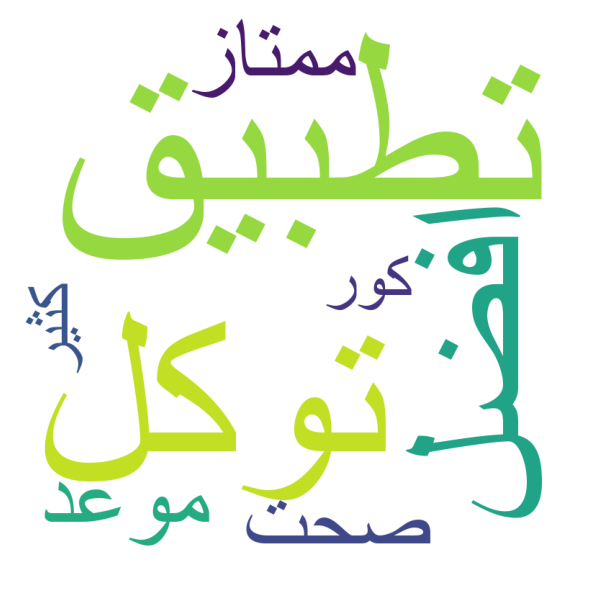

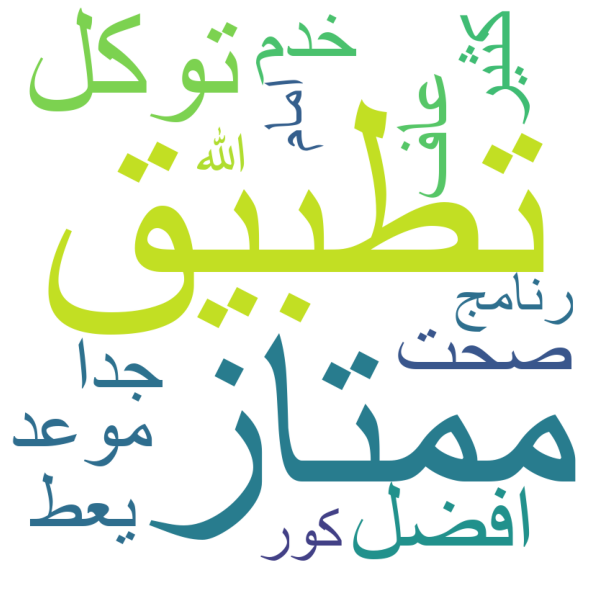

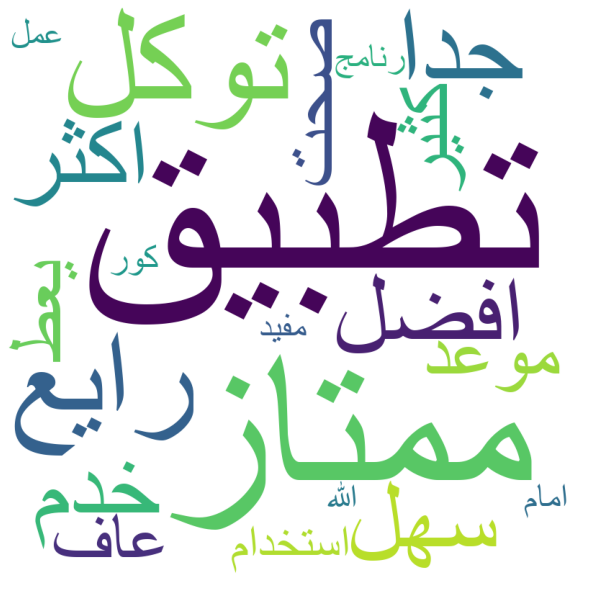

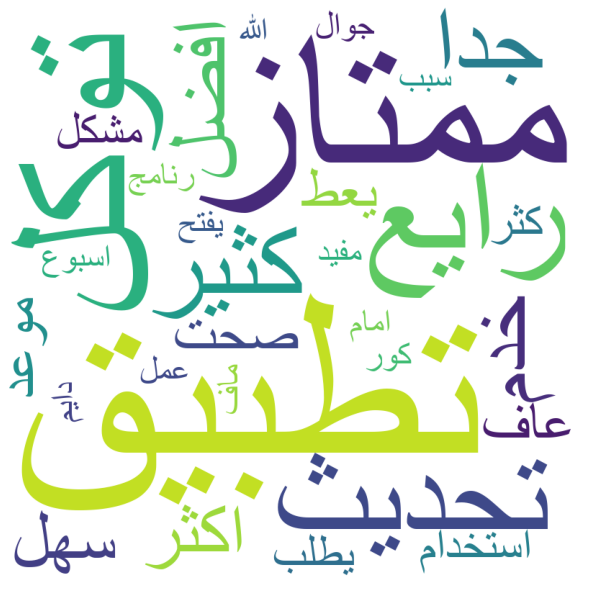

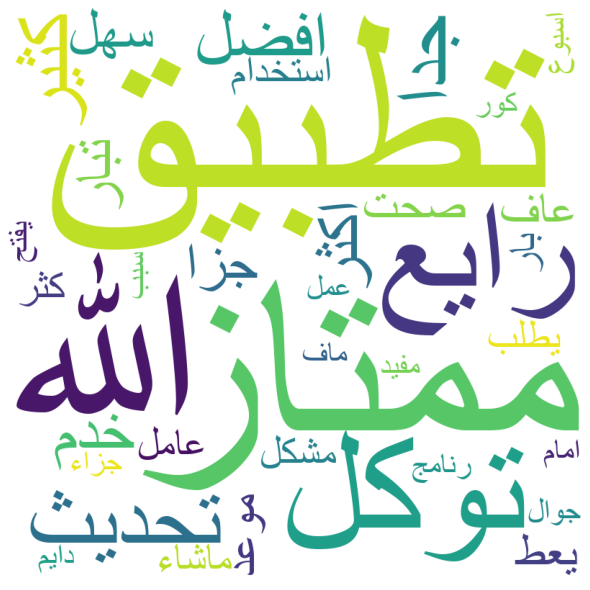

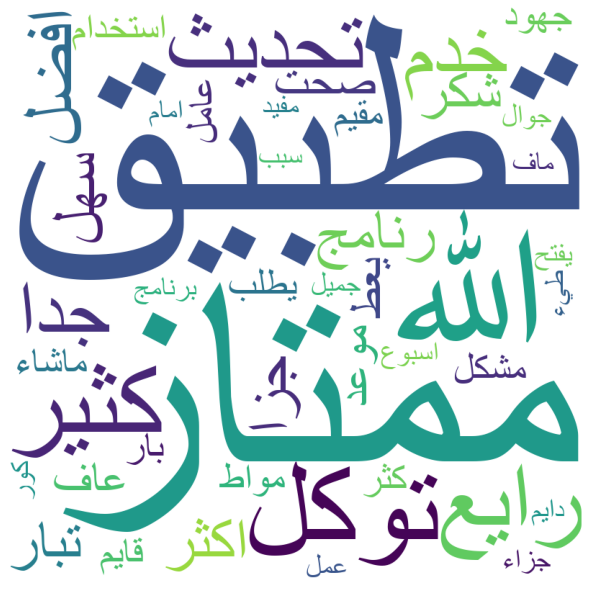

In [94]:

comment_words = '' 
stopwords = set(topics) 


for val in topics: 

    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 

    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
        text_to_be_reshaped = tokens[i]
        reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped)
        tokens[i] = reshaped_text[::-1] 
    comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', font_path = 'arial.ttf',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = "white") 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

### A plot the number of most common opinions in tawakkalna application  using the plot method:

<AxesSubplot:>

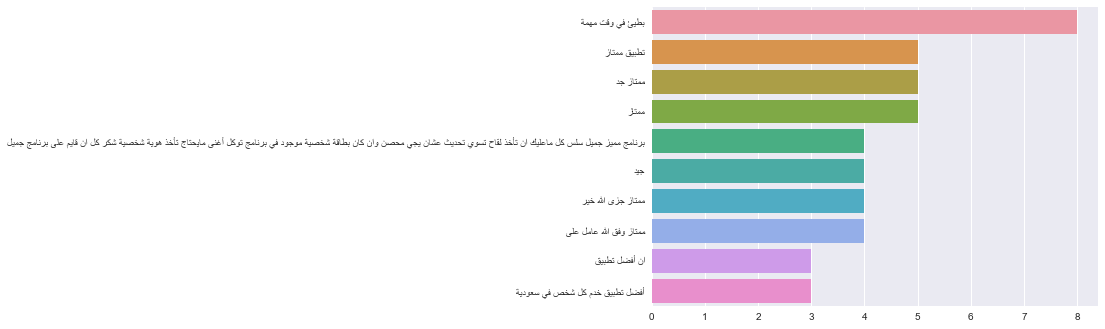

In [102]:
stop=stopwords_list
counter=Counter(data)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        reshaped_text = arabic_reshaper.reshape(word)
        word= reshaped_text[::-1] 
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)